# CS512 (AI) Lab Assignment - 2

### **Due on: 8th Nov 2023 2400 Hrs | Total Marks: 100**

**Submission Instructions**:

All submission is through google classroom submitting the colab (.ipynb file). In case you face any trouble with the submission, please contact the TAs:

- Sushil Ghildiyal sushil.20csz0021@iitrpr.ac.in
- Surbhi Madan, surbhi.19csz0011@iitrpr.ac.in
- Armaan Garg, armaan.19csz0002@iitrpr.ac.in
- Kapil Rana, 2018csz0007@iitrpr.ac.in
- Rahul Narava, syam.21csz0018@iitrpr.ac.in

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

**Penalty Policy**: Late submissions will attract penalties. There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. for 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.

All the plots and observations should be added to the colab notebook itself.

**Naming Convention**:

Name the colab file submission as follows: Name_rollnumber_Labnumber.ipynb
E.g. if your name is ABC, roll number is 2019csx1234 and submission is for assignment2 then you should name the colab file as: ABC_2019csx1234_Lab2.ipynb


# Q1: Gibbs Sampling

Consider a data set on the heights of 695 women and 562 men.
Suppose we have the list of heights, but we don’t know which data
points are from women and which are from men. The data points are available [here](https://drive.google.com/file/d/1_sweLfvqtqdy6oRuAKAG9Le3H-LWaFVK/view?usp=sharing).
The combined distribution of all 1257 heights is shown below.


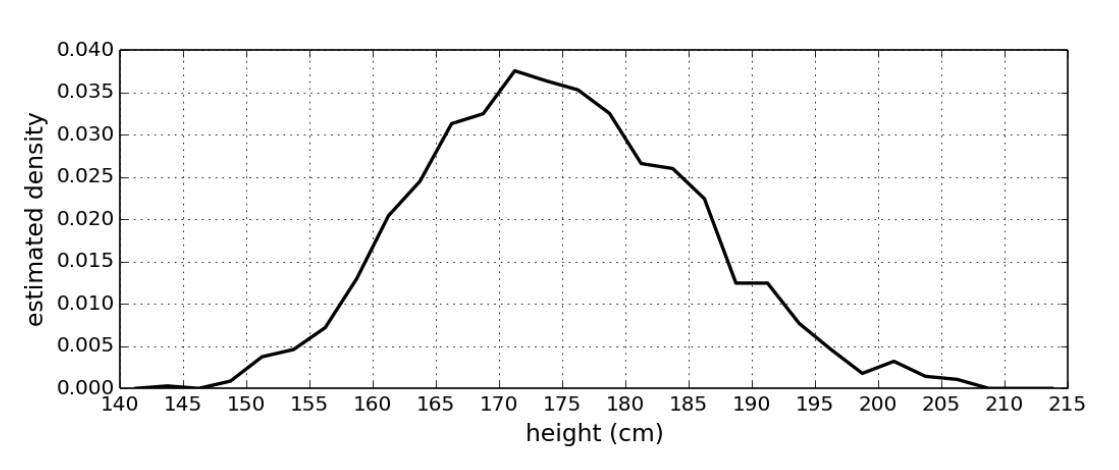


Consider that the combined height distribution is a two-component mixture of Normals, and there is an (essentially) unique set of mixture parameters
corresponding to each particular distribution.

To find individual distributions, let us consider a variable $Z_i$ that
indicates whether the subject i is female or male.
The mixture distribution can be specified as:


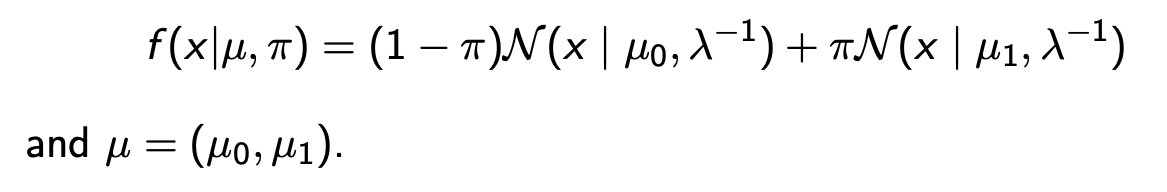


The full conditional distribution i.e. p($x_{1:n}$|µ, π) is a complicated function of µ and π, making the posterior difficult to sample from directly. Hence, we are going to use Gibbs sampling method to make our estimate for the individual components of the height gaussians.

The conditional distributions are specified as:


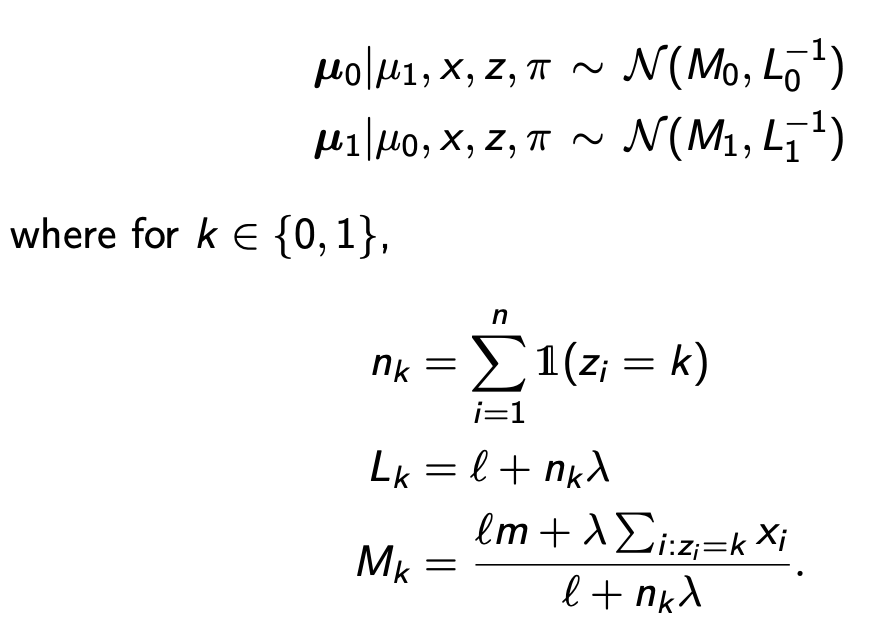


# $p(z|\mu, \pi, x)=$ 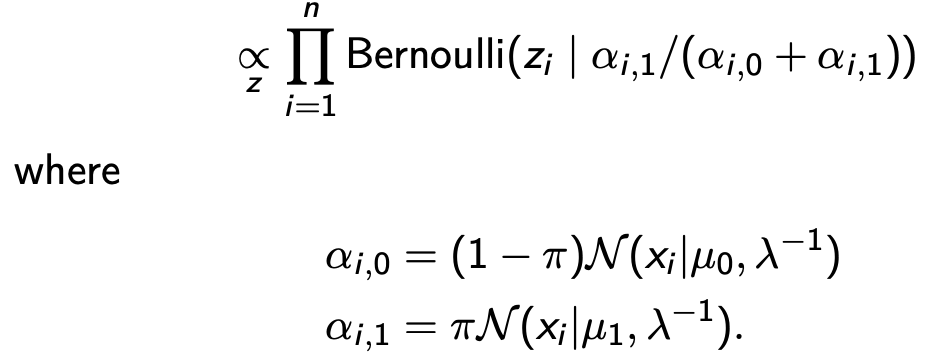


# $\pi = \frac{n_k}{n}$


The complete process can be specified as below:
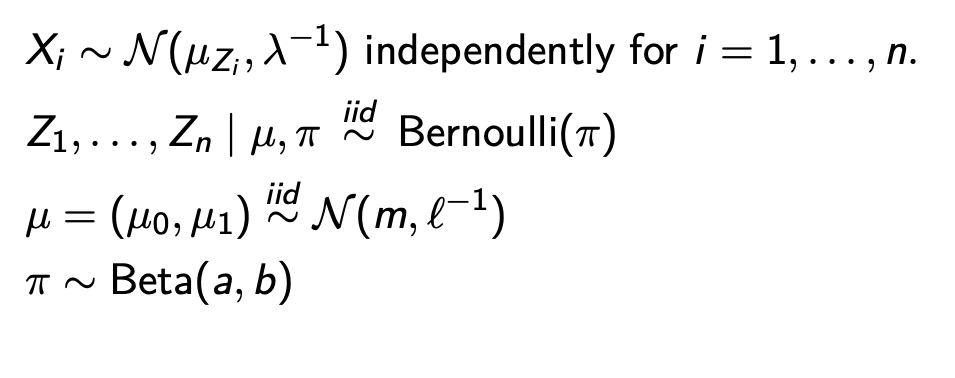


Consider the following initializations:

$\lambda = \frac{1}{\sigma^2}$ where $\sigma = 8$cm.

$m = 175 cm$

$l = \frac{1}{s^2}$ where $s = 15$cm.

a = 1, b = 1 (Beta parameters, equivalent to prior “sample
size” of 1 for each component)

$\pi = 0.5 $

$z_1, . . . , z_n$ are sampled i.i.d. from Bernoulli(1/2) (initial assignment
to components chosen uniformly at random)

$µ_0 = µ_1 = m$ (component means initialized to the mean of
their prior)

Q.1. Use a Gibbs Sampler given the conditionals and initializations provided above and plot the $µ_0, µ_1$ for 1000 samples. [10 marks]

Q.2. Plot the histograms of the heights of subjects assigned to each
component, according to $z_1, . . . , z_n$, in a typical sample after 1000 samples. [10 marks]

Q.3. Plot the $\pi$ for each iterations for both the components. [10 marks]


C:\Users\mitta\AppData\Local\Temp\ipykernel_12004\3424092576.py:46: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  s_0 = np.sum((z == 0) * (x - mu_0) ** 2 for x in all_heights)
C:\Users\mitta\AppData\Local\Temp\ipykernel_12004\3424092576.py:52: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  s_1 = np.sum((z == 1) * (x - mu_1) ** 2 for x in all_heights)


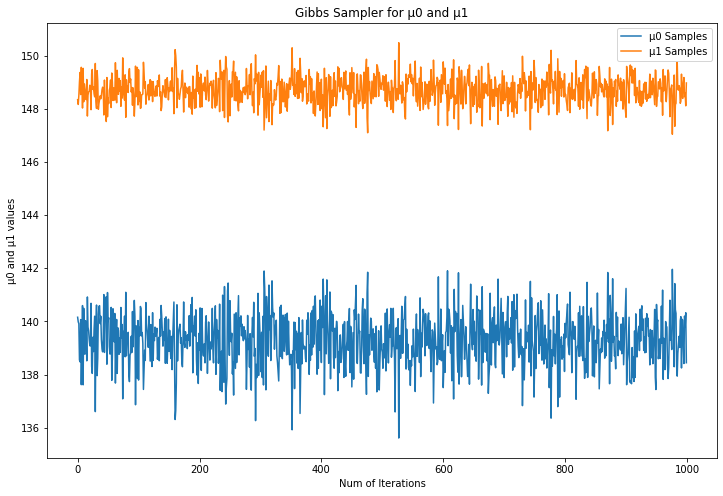

In [24]:
# Gibbs Sampling for 1000 samples

# import all required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# all given variables and values

sigma_sq = 8
m = 175
s_sq = 15
a = 1
b = 1
pi = 0.5
n = 1257
z = np.random.binomial(1, pi, size=n)
mu_0 = mu_1 = m
theta = 0.6

# read the csv file for heights and store height of all the people

data = pd.read_csv("Height.csv")
all_heights = []
for ind, row in data.iterrows():
    height = row["Height (in cm)"]
    count = row["Number of people"]
    all_heights.extend([height] * count)

mu_0_samples = []
mu_1_samples = []

# Gibbs sampler running for 1000 samples

for itr in range(1000):
    for i in range(n):
        theta_0 = (1 - pi) * np.exp(-0.5 * (all_heights[i] - mu_0) ** 2 / sigma_sq)
        theta_1 = pi * np.exp(-0.5 * (all_heights[i] - mu_1) ** 2 / sigma_sq)

        theta_i = theta_1 / (theta_0 + theta_1)

        z[i] = np.random.binomial(1, theta)

    n_0 = np.sum(z == 0)
    s_0 = np.sum((z == 0) * (x - mu_0) ** 2 for x in all_heights)
    precision_0 = 1 / (s_sq + n_0 / sigma_sq)
    mean_0 = precision_0 * (m / s_sq + np.sum((z == 0) * all_heights) / sigma_sq)
    mu_0 = np.random.normal(mean_0, np.sqrt(precision_0))

    n_1 = np.sum(z == 1)
    s_1 = np.sum((z == 1) * (x - mu_1) ** 2 for x in all_heights)
    precision_1 = 1 / (s_sq + n_1 / sigma_sq)
    mean1 = precision_1 * (m / s_sq + np.sum((z == 1) * all_heights) / sigma_sq)
    mu_1 = np.random.normal(mean1, np.sqrt(precision_1))

    a_n = a + n_0
    b_n = b + n_1
    pi = np.random.beta(a_n, b_n)

    mu_0_samples.append(mu_0)
    mu_1_samples.append(mu_1)

# plot the curve for µ0 and µ1 for 1000 samples

plt.figure(figsize=(12, 8))
plt.plot(range(1000), mu_0_samples, label="µ0 Samples")
plt.plot(range(1000), mu_1_samples, label="µ1 Samples")
plt.xlabel("Num of Iterations")
plt.ylabel("µ0 and µ1 values")
plt.title("Gibbs Sampler for µ0 and µ1")
plt.legend()
plt.show()

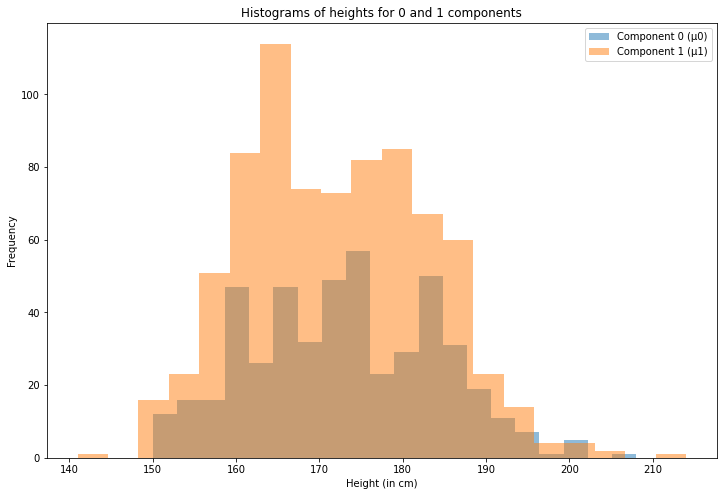

In [25]:
# Histogram for both components

heights_component_0 = [all_heights[i] for i in range(n) if z[i] == 0]

heights_component_1 = [all_heights[i] for i in range(n) if z[i] == 1]

plt.figure(figsize=(12, 8))
plt.hist(heights_component_0, bins=20, alpha=0.5, label="Component 0 (µ0)")
plt.hist(heights_component_1, bins=20, alpha=0.5, label="Component 1 (µ1)")
plt.xlabel("Height (in cm)")
plt.ylabel("Frequency")
plt.title("Histograms of heights for 0 and 1 components")
plt.legend()
plt.show()

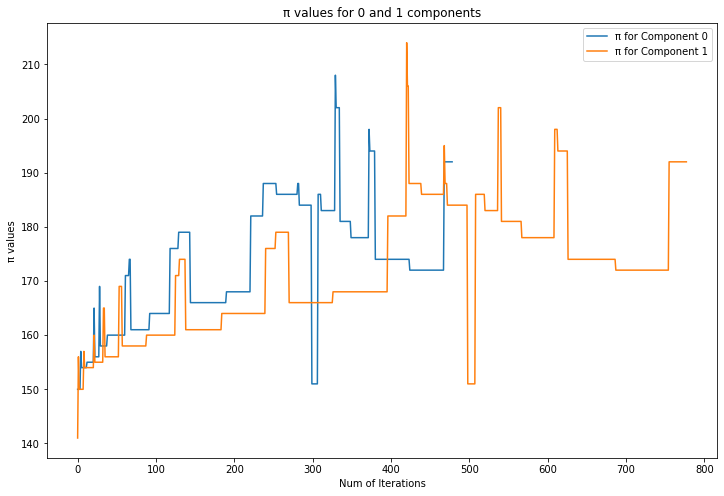

In [26]:
# π for both components

pi_component_0_samples = [all_heights[i] for i in range(n) if z[i] == 0]
pi_component_1_samples = [all_heights[i] for i in range(n) if z[i] == 1]

plt.figure(figsize=(12, 8))
plt.plot(pi_component_0_samples, label="π for Component 0")
plt.plot(pi_component_1_samples, label="π for Component 1")
plt.xlabel("Num of Iterations")
plt.ylabel("π values")
plt.title("π values for 0 and 1 components")
plt.legend()
plt.show()

# Q2: Particle Filter Simulation for Robot Localization

A traveller needs to locate its beloved robot in an unkwown city, but luckly he has a tool that provides the data from the sensors of the robot, but the sensors are not perfect and can provide noisy measurements (the noise information is provided in the code below). Your task is to help the traveller by implementing a Particle Filter algorithm to accurately localize the zone of the robot within the city.

zone = [

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['1', '1', '1', '4', '4', '4', '4', '7', '7', '7'],

    ['2', '2', '2', '4', '4', '4', '4', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '8', '8', '8'],

    ['2', '2', '2', '5', '5', '5', '5', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9'],

    ['3', '3', '3', '6', '6', '6', '6', '9', '9', '9']

]

environment = [

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E'],

    ['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']

]

In the give environment, 'S' denotes the location of the robot and W denotes walls.


**Transition function**


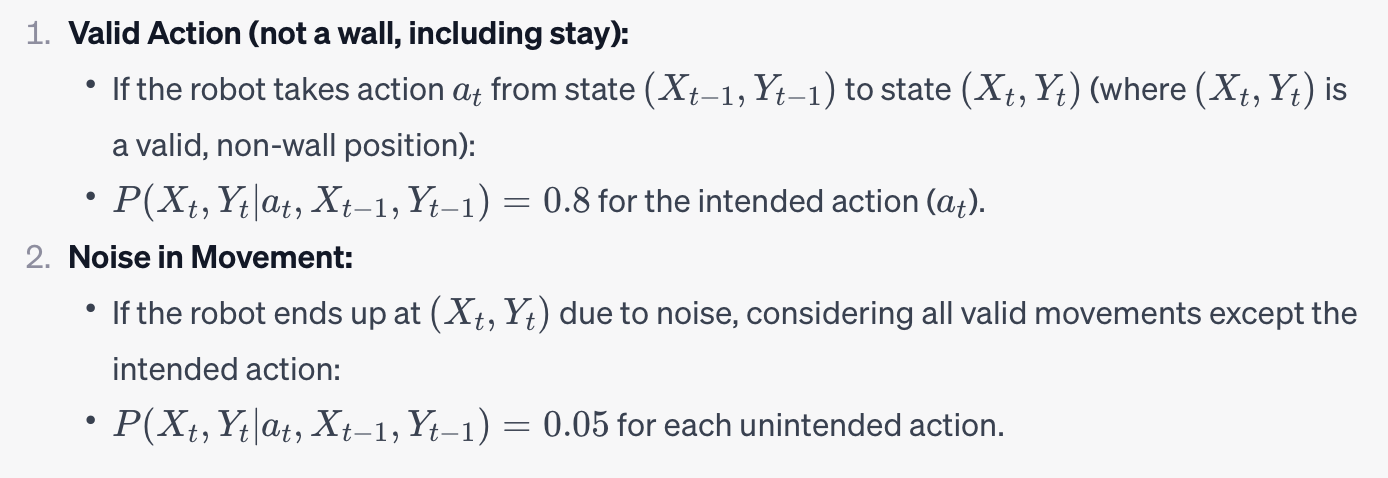


The observation probability P($z_t | x_t, y_t$) represents the probability of the sensor measurement $z_t$ given the true position $x_t, y_t$. The observation probability is 1 indicating that the sensor always detects the true state of the system without any errors, noise, or uncertainty.


**Wrtie a function for the random movement of the robot at each time-step where the action set is {N,S,E,W, stay} where each action is equally likely.**

**[PART 1]** Implement the Particle Filter algorithm (take 5 particles, randomly initialized at empty locations) to localize the robot by estimating its zone after every 10 iterations, till correct zone is located or upto max 100 iterations **[15 marks]**

**Note: Use the 8 neighbouring cells correspoding to the robot and each particle to measure their likehood.**

Example:

Robot (where S denotes the robot)

[E E E]

[W S W]

[E E E]

Particle (where P denotes the particle)

[E E E]

[W P E]

[E E E]

The likelihood of this particle being in the same zone as the robot is 7/8 as their is similarity of 7 neighbouring cells out of 8 based on the sensed infromation.

**[PART 2]** Heatmap: Create a heatmap of the grid where colors represent the probability or weight associated with different cells. Darker colors indicate higher probabilities, providing a visual representation of the confidence in different areas of the grid. **[15 marks]**


In [27]:
# PART 1 Particle Filter Algorithm

# import required libraries

import random
import matplotlib.pyplot as plt
import numpy as np

# function to get all the valid actions for robot


def valid_actions(x, y, environment):
    actions = [(x, y)]

    if x > 0 and environment[x - 1][y] != "W":
        actions.append((x - 1, y))
    if x < len(environment) - 1 and environment[x + 1][y] != "W":
        actions.append((x + 1, y))
    if y > 0 and environment[x][y - 1] != "W":
        actions.append((x, y - 1))
    if y < len(environment[0]) - 1 and environment[x][y + 1] != "W":
        actions.append((x, y + 1))

    return actions


# function to make a random movement out of a valid sets of actions


def random_move(x, y, environment):
    actions = valid_actions(x, y, environment)
    return random.choice(actions)


# PART 2 Heat Map


def create_heatmap(environment, particles, weights):
    heatmap = np.zeros_like(environment, dtype=float)

    for p, w in zip(particles, weights):
        heatmap[p[0], p[1]] += w

    return heatmap


# function to get the particle likelihood


def particle_likelihood(robot, particle, environment, zone):
    similarity = 0

    for i in range(-1, 2):
        for j in range(-1, 2):
            if (
                0 <= robot[0] + i < len(environment)
                and 0 <= robot[1] + j < len(environment[0])
                and 0 <= particle[0] + i < len(environment)
                and 0 <= particle[1] + j < len(environment[0])
            ):
                if (
                    environment[robot[0] + i][robot[1] + j]
                    == environment[particle[0] + i][particle[1] + j]
                    == zone[robot[0] + i][robot[1] + j]
                ):
                    similarity += 1

    return similarity / 8.0


# particle filter algorithm which prints heatmap after every 10 iterations


def particle_filter(random_particles, max_iterations, environment, zone):
    particles = [
        (
            random.choice(range(len(environment))),
            random.choice(range(len(environment[0]))),
        )
        for _ in range(random_particles)
    ]

    for itr in range(max_iterations):

        # make a random move and check likelihood

        robot = random_move(particles[0][0], particles[0][1], environment)

        particles = [random_move(p[0], p[1], environment) for p in particles]

        likelihood = [
            particle_likelihood(robot, p, environment, zone) for p in particles
        ]

        epsilon = 1e-10
        weights = np.array(likelihood) + epsilon
        weights /= sum(weights)
        particles = random.choices(particles, weights=weights, k=len(particles))

        if environment[robot[0]][robot[1]] == "S":
            print(f"After {itr} iterations Robot is located in correct zone.")
            break

        # print the heatmap and estimated zone after every 10 iterations

        if itr % 10 == 0:
            if itr == 0:
                print(f"Initial Zone:")
            else:
                print(f"Estimated Zone after {itr} Iterations:")

            for i in range(len(environment)):
                print(environment[i])
            print("\n")

            heatmap = create_heatmap(environment, particles, weights)
            plt.imshow(heatmap, cmap="hot", interpolation="nearest")
            plt.show()

Initial Zone:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




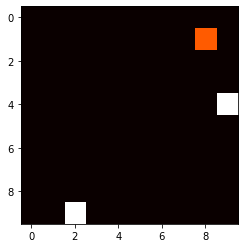

Estimated Zone after 10 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




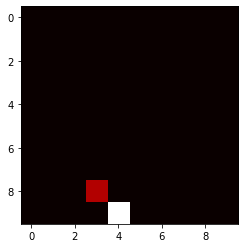

Estimated Zone after 20 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




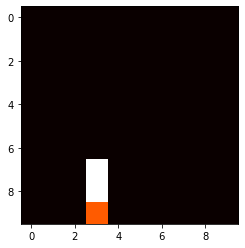

Estimated Zone after 30 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




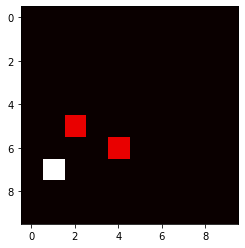

Estimated Zone after 40 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




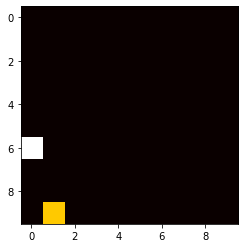

Estimated Zone after 50 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




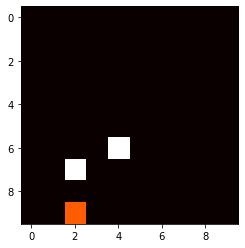

Estimated Zone after 60 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




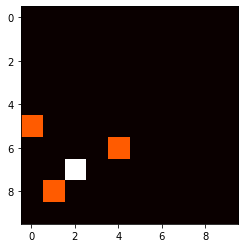

Estimated Zone after 70 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




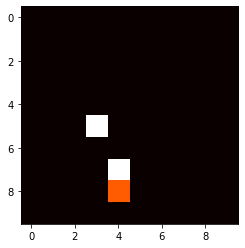

Estimated Zone after 80 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




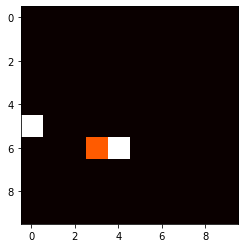

Estimated Zone after 90 Iterations:
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E', 'E']
['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W', 'E']
['E', 'E', 'E', 'E', 'E', 'W', 'E', 'E', 'E', 'E']




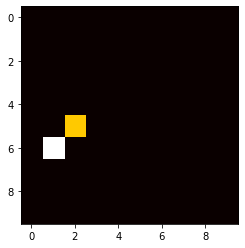

In [28]:
environment = [
    ["E", "E", "E", "E", "E", "E", "E", "S", "E", "E"],
    ["E", "E", "E", "E", "E", "E", "E", "E", "E", "E"],
    ["E", "E", "E", "E", "E", "E", "E", "E", "E", "E"],
    ["E", "E", "E", "E", "W", "E", "E", "E", "E", "E"],
    ["E", "E", "E", "E", "W", "E", "E", "E", "E", "E"],
    ["E", "E", "E", "E", "E", "W", "W", "E", "E", "E"],
    ["E", "E", "E", "E", "E", "E", "W", "W", "E", "E"],
    ["E", "E", "E", "E", "E", "E", "E", "W", "E", "E"],
    ["E", "E", "E", "E", "E", "E", "E", "E", "W", "E"],
    ["E", "E", "E", "E", "E", "W", "E", "E", "E", "E"],
]

zone = [
    ["1", "1", "1", "4", "4", "4", "4", "7", "7", "7"],
    ["1", "1", "1", "4", "4", "4", "4", "7", "7", "7"],
    ["1", "1", "1", "4", "4", "4", "4", "7", "7", "7"],
    ["2", "2", "2", "4", "4", "4", "4", "8", "8", "8"],
    ["2", "2", "2", "5", "5", "5", "5", "8", "8", "8"],
    ["2", "2", "2", "5", "5", "5", "5", "8", "8", "8"],
    ["2", "2", "2", "5", "5", "5", "5", "9", "9", "9"],
    ["3", "3", "3", "6", "6", "6", "6", "9", "9", "9"],
    ["3", "3", "3", "6", "6", "6", "6", "9", "9", "9"],
    ["3", "3", "3", "6", "6", "6", "6", "9", "9", "9"],
]

particle_filter(5, 100, environment, zone)

# Question 3: X-Men MDP


Most of the X-Men are mutants, a subspecies of humans who are born with superhuman abilities activated by the "X-Gene". The X-Men fight for peace and equality between normal humans and mutants in a world where anti-mutant bigotry is fierce and widespread. They are led by Charles Xavier, also known as Professor X, a powerful mutant telepath who can control and read minds. Their archenemy is Magneto, a powerful mutant with the ability to manipulate and control magnetic fields who leads the Brotherhood of Mutants. Both have opposing views and philosophies regarding the relationship between mutants and humans. While the former works towards peace and understanding between mutants and humans, the latter views humans as a threat and believes in taking an aggressive approach against them.

Jean Grey is one of the most beloved X-Men. But when a mission goes wrong, Jean is exposed to a dark and ancient power. This power has destroyed everything it comes in contact with, until her. Now that this power is becoming unstable, she releases it with destruction and anger. Now that this foreign power is consuming her, and the world is threatened, the X-Men have to face an important truth: they must save either the world, or their friend who threatens it. Magneto calls her ‘The phoenix’ and intends to use her to declare war against humanity.

In this question, you will use some algorithms to compute optimal policies in Markov decision processes (MDP’s) to help wolverine escape from Magneto while trying to find Jean in order to kill her.

You are given the following grid world where Wolverine and other mutants from Xavier's School for Gifted Youngsters live along with Magneto and his brotherhood of mutants.


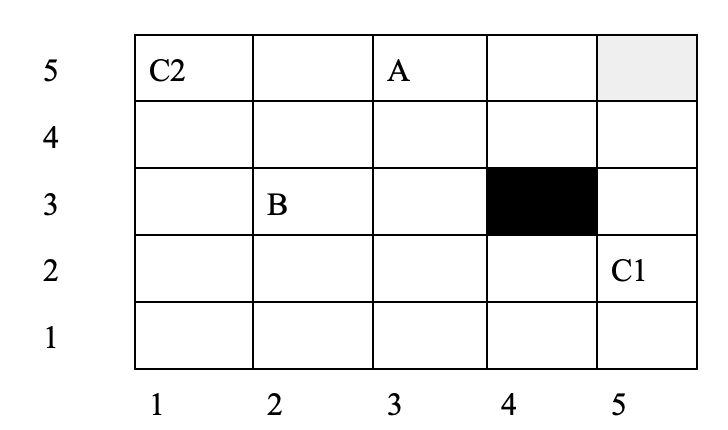


The wolverine (A) can occupy any of the 24 blank squares. The Magneto (B) also can occupy any square, except for square (5,5) which is Xavier’s school of Gifted Youngsters. Jean which can be at C1(5,2) or C2(1,5). Currently, she is at (5,2). Thus, MDP has 24*23*2 = 1104 states.

Wolverine and Magneto can each move one square in any direction - Up,down,left and right but not diagonal. They also can choose not to move at all. (4,3) is blocked due to the wall. Thus, there are 5 possible moves from each square. If an action is attempted that causes the characters(Wolverine and Magneto) to bump into a wall, then simply stay at the same location. In this problem, we will always take the point of view of the wolverine.

Reward Policies:

When Wolverine is at Jean’s place, it receives a reward of +20.
When Magneto is at Wolverine’s place, Wolverine receives a reward of -20.
When the Magneto is at wolverine’s place and wolverine is at jean’s place, the reward is -15.

All other configurations have a reward of 0.
Thus, the wolverine is trying to kill Jean while simultaneously avoiding the Magneto.

Jean is always available in exactly one of the two locations listed above. At every time step, Jean remains where she is with 80% probability. With 20% probability, Jean vanishes and reappears at another location.

States are encoded as six tuples, the first two numbers indicating the position of Magneto, the second two numbers the position of Wolverine, and the last two numbers the position of Jean. Thus, 2:3:3:5:5:2 indicates, as depicted in the figure above, that Magneto is in (2,3), Wolverine is in (3,5), and Jean is in (5,2). Magneto and wolverine take alternate moves. However, in encoding the MDP, we collapse both moves into a single state transition. In addition, Jean, when she moves, does so simultaneously with the wolverine's move. For instance, from the configuration above, if the wolverine moves to (2,5) and the Magneto responds by moving to (2,4), while jean moves to (1,5), this all would be encoded as a single transition from state 2:3:3:5:5:2 to 2:4:2:5:1:5.

The Wolverine and Magneto have 4 actions available ('UP', 'RIGHT', 'DOWN' and 'LEFT'). Each action moves the Wolverine/Magneto in its direction with probability 0.95. When the wolverine tries to move outside of the grid, the action will have no effect with probability 1. Staying in its own state will happen with probability 0.05.

We will consider two versions of Magneto:

In first version, Magneto is dumb and lazy, simply wanders randomly around its environment choosing randomly among its available actions at every step.
In the second version, Magneto is intelligent and active. Here, Magneto always heads straight for wolverine following the shortest path possible. Thus, after wolverine makes its move, Magneto chooses the action that will move it as close as possible to the wolverine's new position. (If there is a tie among the Magneto's best available options, the Magneto chooses randomly among these equally good best actions.)

For both versions of Magneto, your job will be to compute the wolverine's optimal policy, i.e. the action that should be taken at each state to maximize the wolverine's expected discounted reward, where we fix the discount factor (gamma) to be 0.85.

**Task 1:** Implement value iteration for both versions of Magneto on MDP [10 points]

**Task 2:** Implement policy iteration for both versions of Magneto [10 points]

**Task 3:** Implement and visualize the MDP board and strategy (policy) graphically [10 points]

**Task 4:** Compare the results for all the four approaches - Value iteration for lazy Magneto, Value iteration for active Magneto, Policy iteration for lazy Magneto, Policy iteration for active Magneto with proper tables/graphs/statistics. Comment which one is best among all the four mentioned approaches. [10 points]


In [29]:
# Value Lazy

from random import randint, seed
from tqdm import tqdm
import copy
from os import system, name

blocked_square = (4, 3)
xavier_school = (5, 5)
grid_dim = 5
jean_positions = [(5, 2), (1, 5)]
moves_list = [(1, 0), (0, 1), (0, -1), (-1, 0)]


class Jean(object):
    def __init__(self):
        self.possible_position = [(5, 2), (1, 5)]
        self.pos_bool = randint(0, 1)

    def getCurrentPosition(self):
        return self.possible_position[self.pos_bool]

    def nextMove(self):
        if randint(1, 10) >= 9:
            self.pos_bool = 1 - self.pos_bool

        return self.getCurrentPosition()


class LazyMagneto(object):
    def __init__(self):
        self.pos = (randint(1, 5), randint(1, 5))
        while True:
            if self.checkValidMove(self.pos) == False:
                self.pos = (randint(1, 5), randint(1, 5))
            else:
                break
        self.possible_moves = [(1, 0), (0, 1), (0, -1), (-1, 0)]

    def checkValidMove(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != xavier_school and next_pos != blocked_square:
                return True
        return False

    def getCurrentPosition(self):
        return self.pos

    def nextMove(self):
        while True:
            next_move = self.possible_moves[randint(0, len(self.possible_moves) - 1)]
            next_pos = tuple(map(lambda i, j: i + j, next_move, self.pos))
            if self.checkValidMove(next_pos) == True:
                break

        if randint(1, 20) <= 19:
            self.pos = next_pos

        return self.getCurrentPosition()


def checkValidMoveWolverine(next_pos):
    if (
        next_pos[0] < grid_dim + 1
        and next_pos[0] > 0
        and next_pos[1] < grid_dim + 1
        and next_pos[1] > 0
    ):
        if next_pos != blocked_square:
            return True
    return False


class LazyMDP:
    def __init__(self):
        self.states = {}
        self.policy = {}
        self.isEndState = {}
        self.discount = 0.85
        self.movementProb = 0.95
        self.jeanMovementProb = 0.2
        self.converge_eps = 1e-1

        for magneto_i in range(1, grid_dim + 1):
            for magneto_j in range(1, grid_dim + 1):
                if (magneto_i, magneto_j) == xavier_school or (
                    magneto_i,
                    magneto_j,
                ) == blocked_square:
                    continue
                for wolverine_i in range(1, grid_dim + 1):
                    for wolverine_j in range(1, grid_dim + 1):
                        if (wolverine_i, wolverine_j) == blocked_square:
                            continue

                        for jean_pos in jean_positions:
                            if (wolverine_i, wolverine_j) == jean_pos and (
                                magneto_i != wolverine_i or magneto_j != wolverine_j
                            ):
                                self.states[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 20
                                self.isEndState[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 1
                            elif (
                                (wolverine_i, wolverine_j) == jean_pos
                                and magneto_i == wolverine_i
                                and magneto_j == wolverine_j
                            ):
                                self.states[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = -15
                                self.isEndState[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 1
                            elif (
                                (wolverine_i, wolverine_j) != jean_pos
                                and magneto_i == wolverine_i
                                and magneto_j == wolverine_j
                            ):
                                self.states[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = -20
                                self.isEndState[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 1
                            else:
                                self.states[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 0
                                self.isEndState[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 0

    def checkValidMoveWolverine(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != blocked_square:
                return True
        return False

    def checkValidMoveMagneto(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != blocked_square and next_pos != xavier_school:
                return True
        return False

    def train(self):
        states_temp = {}

        max_iterations = int(1e5)

        print("Training......")
        for _ in tqdm(range(max_iterations)):
            converged = True
            for key in self.states.keys():
                if self.isEndState[key] == 1:
                    states_temp[key] = self.states[key]
                    self.policy[key] = None
                    continue
                possible_s = []
                possible_act = []
                # for each possible action that wolverine can take
                for action in moves_list:
                    # current position of all three characters
                    magneto_pos = (key[0], key[1])
                    wolverine_pos = (key[2], key[3])
                    jean_pos = (key[4], key[5])
                    # get the next wolverine position and check if its valid(staying inside grid, etc)
                    next_wolverine_pos = tuple(
                        map(lambda i, j: i + j, wolverine_pos, action)
                    )
                    if self.checkValidMoveWolverine(next_wolverine_pos) == True:
                        # explore all possible states for this wolverine move
                        q_sa = 0

                        # count all possible moves of magneto????????
                        count_valid_mag_moves = 0
                        for mag_action in moves_list:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos) == True:
                                count_valid_mag_moves += 1

                        # for each possible move of jean and magneto find the transition function, v(s'), reward
                        for mag_action in moves_list:
                            transition_prob = (
                                self.movementProb
                                * self.movementProb
                                / count_valid_mag_moves
                            )
                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(
                                    map(lambda i, j: i + j, magneto_pos, mag_action)
                                )
                                if self.checkValidMoveMagneto(next_magneto_pos):
                                    if jean_pos == jean_action:
                                        transition_prob *= 1 - self.jeanMovementProb
                                        next_state = (
                                            next_magneto_pos
                                            + next_wolverine_pos
                                            + jean_pos
                                        )
                                    else:
                                        transition_prob *= self.jeanMovementProb
                                        next_state = (
                                            next_magneto_pos
                                            + next_wolverine_pos
                                            + jean_action
                                        )

                                    if self.isEndState[next_state] == True:
                                        q_sa += transition_prob * (
                                            self.states[next_state] + 0
                                        )
                                    else:
                                        q_sa += transition_prob * (
                                            0 + self.states[next_state] * self.discount
                                        )

                        # when magneto doesnt move with prob 0.05
                        transition_prob = self.movementProb * (1 - self.movementProb)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos == jean_action:
                                transition_prob *= 1 - self.jeanMovementProb
                                next_state = (
                                    next_magneto_pos + next_wolverine_pos + jean_pos
                                )
                            else:
                                transition_prob *= self.jeanMovementProb
                                next_state = (
                                    next_magneto_pos + next_wolverine_pos + jean_action
                                )

                            if self.isEndState[next_state] == True:
                                q_sa += transition_prob * (self.states[next_state] + 0)
                            else:
                                q_sa += transition_prob * (
                                    0 + self.states[next_state] * self.discount
                                )

                        # When wolverine doesnt move
                        for mag_action in moves_list:
                            transition_prob = (
                                (1 - self.movementProb)
                                * self.movementProb
                                / count_valid_mag_moves
                            )
                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(
                                    map(lambda i, j: i + j, magneto_pos, mag_action)
                                )
                                if self.checkValidMoveMagneto(next_magneto_pos):
                                    if jean_pos == jean_action:
                                        transition_prob *= 1 - self.jeanMovementProb
                                        next_state = (
                                            next_magneto_pos + wolverine_pos + jean_pos
                                        )
                                    else:
                                        transition_prob *= self.jeanMovementProb
                                        next_state = (
                                            next_magneto_pos
                                            + wolverine_pos
                                            + jean_action
                                        )

                                    if self.isEndState[next_state] == True:
                                        q_sa += transition_prob * (
                                            self.states[next_state] + 0
                                        )
                                    else:
                                        q_sa += transition_prob * (
                                            0 + self.states[next_state] * self.discount
                                        )

                        # when magneto doesnt move with prob 0.05
                        transition_prob = (1 - self.movementProb) * (
                            1 - self.movementProb
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos == jean_action:
                                transition_prob *= 1 - self.jeanMovementProb
                                next_state = next_magneto_pos + wolverine_pos + jean_pos
                            else:
                                transition_prob *= self.jeanMovementProb
                                next_state = (
                                    next_magneto_pos + wolverine_pos + jean_action
                                )

                            if self.isEndState[next_state] == True:
                                q_sa += transition_prob * (self.states[next_state] + 0)
                            else:
                                q_sa += transition_prob * (
                                    0 + self.states[next_state] * self.discount
                                )

                        possible_s.append(q_sa)
                        possible_act.append(action)
                states_temp[key] = max(possible_s)
                idx = possible_s.index(max(possible_s))
                self.policy[key] = possible_act[idx]

            for key in self.states.keys():
                if abs(states_temp[key] - self.states[key]) > self.converge_eps:
                    converged = False
            if converged == True:
                print("Converged")
                break
            self.states = copy.deepcopy(states_temp)

    def getNextMove(self, magneto_pos, wolverine_pos, jean_pos):
        state = magneto_pos + wolverine_pos + jean_pos
        return self.policy[state]


def findWinner(jeanPosition, magnetoPosition, wolverinePosition):
    if jeanPosition != magnetoPosition and magnetoPosition == wolverinePosition:
        return -1
    elif jeanPosition == magnetoPosition and magnetoPosition == wolverinePosition:
        return 0
    elif jeanPosition == wolverinePosition and wolverinePosition != magnetoPosition:
        return 1
    return -100


def drawBoard(jeanPosition, magnetoPosition, wolverinePosition):
    print("Jean Position:", jeanPosition)
    print("Magneto Position:", magnetoPosition)
    print("Wolverine Position", wolverinePosition)
    l = [0] * grid_dim
    grid = []
    for _ in range(grid_dim):
        grid.append(copy.deepcopy(l))

    grid[jeanPosition[0] - 1][jeanPosition[1] - 1] = "J"
    grid[wolverinePosition[0] - 1][wolverinePosition[1] - 1] = "W"
    grid[magnetoPosition[0] - 1][magnetoPosition[1] - 1] = "M"
    grid[blocked_square[0] - 1][blocked_square[1] - 1] = "-1"
    grid[xavier_school[0] - 1][xavier_school[1] - 1] = "X"

    for i in range(grid_dim):
        for j in range(grid_dim):
            print(grid[i][j], end=" ")
        print()
    print()


def trials(mdp, num_trials=100000):
    num_wolverine_wins = 0
    num_draws = 0
    num_magneto_wins = 0

    for _ in tqdm(range(num_trials)):
        max_iter = int(1e6)
        jean = Jean()
        magneto = LazyMagneto()

        jeanPosition = jean.getCurrentPosition()
        magnetoPosition = magneto.getCurrentPosition()
        wolverinePosition = (randint(1, 5), randint(1, 5))
        while True:
            if checkValidMoveWolverine(wolverinePosition) == False:
                wolverinePosition = (randint(1, 5), randint(1, 5))
            else:
                break

        total_iterations = 0
        for _ in range(max_iter):
            result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
            if result == -100:
                total_iterations += 1
                jean.nextMove()
                magneto.nextMove()
                jeanPosition = jean.getCurrentPosition()
                magnetoPosition = magneto.getCurrentPosition()
                next_move = mdp.getNextMove(
                    magnetoPosition, wolverinePosition, jeanPosition
                )
                # print(next_move)
                if next_move is not None:
                    wolverine_next_position = tuple(
                        map(lambda i, j: i + j, wolverinePosition, next_move)
                    )
                    if randint(1, 20) <= 19:
                        wolverinePosition = wolverine_next_position

            elif result == -1:
                num_magneto_wins += 1
                break
            elif result == 0:
                num_draws += 1
                break
            else:
                num_wolverine_wins += 1
                break

    print(num_wolverine_wins * 100 / num_trials)
    print(num_draws * 100 / num_trials)
    print(num_magneto_wins * 100 / num_trials)
    avg_reward = num_wolverine_wins * 20 + num_magneto_wins * -20 + num_draws * -15
    print(avg_reward / num_trials)
    print(total_iterations / num_trials)


def playGame(mdp):
    max_iter = int(1e6)
    jean = Jean()
    magneto = LazyMagneto()

    jeanPosition = jean.getCurrentPosition()
    magnetoPosition = magneto.getCurrentPosition()
    wolverinePosition = (randint(1, 5), randint(1, 5))
    while True:
        if checkValidMoveWolverine(wolverinePosition) == False:
            wolverinePosition = (randint(1, 5), randint(1, 5))
        else:
            break
    print("Initial Board")
    drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
    result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
    for iter_num in range(max_iter):
        result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
        if result == -100:
            jean_next_position = jean.nextMove()
            magneto_next_position = magneto.nextMove()
            result = findWinner(
                jean_next_position, magneto_next_position, wolverinePosition
            )
            if result != -100:
                drawBoard(jean_next_position, magneto_next_position, wolverinePosition)
                break
            next_move = mdp.getNextMove(
                magnetoPosition, wolverinePosition, jeanPosition
            )
            # print(next_move)
            if next_move is not None:
                wolverine_next_position = tuple(
                    map(lambda i, j: i + j, wolverinePosition, next_move)
                )
                if randint(1, 20) <= 19:
                    wolverinePosition = wolverine_next_position

            jeanPosition = jean.getCurrentPosition()
            magnetoPosition = magneto.getCurrentPosition()
            print("After move", iter_num + 1)
            drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
        else:
            break
    if result == -1:
        print("Magneto Wins")
        return -1
    elif result == 0:
        print("Draw")
        return 0
    elif result == 1:
        print("Wolverine Wins")
        return 1
    else:
        print("Iterations Ended")
        return 2


value_lazy_magneto = 0
value_lazy_draw = 0
value_lazy_wolverine = 0

if __name__ == "__main__":
    for i in range(0, 10):
        seed(i)
        mdp = LazyMDP()
        mdp.train()
        result = playGame(mdp)
        if result == -1:
            value_lazy_magneto += 1
        elif result == 0:
            value_lazy_draw += 1
        elif result == 1:
            value_lazy_wolverine += 1

Training......


  0%|          | 9/100000 [00:00<2:59:13,  9.30it/s]


Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 1)
Wolverine Position (3, 5)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 W 
M 0 -1 0 0 
0 0 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (3, 1)
Wolverine Position (2, 5)
0 0 0 0 J 
0 0 0 0 W 
M 0 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (3, 2)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

Wolverine Wins
Training......


  0%|          | 9/100000 [00:00<2:43:47, 10.18it/s]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (5, 1)
Wolverine Position (3, 1)
0 0 0 0 0 
0 0 0 0 0 
W 0 0 0 0 
0 0 -1 0 0 
M J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (4, 1)
Wolverine Position (3, 2)
0 0 0 0 0 
0 0 0 0 0 
0 W 0 0 0 
M 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (5, 1)
Wolverine Position (3, 3)
0 0 0 0 0 
0 0 0 0 0 
0 0 W 0 0 
0 0 -1 0 0 
M J 0 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (5, 1)
Wolverine Position (3, 4)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 W 0 
0 0 -1 0 0 
M J 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (5, 2)
Wolverine Position (4, 4)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 W 0 
0 M 0 0 X 

After move 5
Jean Position: (5, 2)
Magneto Position: (4, 2)
Wolverine Position (5, 4)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 M -1 0 0 
0 J 0 W X 

After move 6
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (5, 3)
0 0 0 0 0 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 


  0%|          | 9/100000 [00:00<2:44:30, 10.13it/s]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (3, 2)
M 0 0 0 0 
0 0 0 0 0 
0 W 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (4, 2)
M 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (1, 2)
Wolverine Position (5, 2)
0 M 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (5, 2)
M 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins
Training......


  0%|          | 9/100000 [00:00<2:44:23, 10.14it/s]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (2, 3)
Wolverine Position (5, 4)
0 0 0 0 0 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 W X 

After move 1
Jean Position: (1, 5)
Magneto Position: (2, 3)
Wolverine Position (5, 3)
0 0 0 0 J 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 W 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (2, 2)
Wolverine Position (5, 2)
0 0 0 0 J 
0 M 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (1, 2)
Wolverine Position (5, 3)
0 M 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 W 0 X 

After move 4
Jean Position: (1, 5)
Magneto Position: (1, 3)
Wolverine Position (5, 2)
0 0 M 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Jean Position: (5, 2)
Magneto Position: (2, 3)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins
Training......


  0%|          | 9/100000 [00:00<2:46:44,  9.99it/s]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (3, 1)
Wolverine Position (4, 4)
0 0 0 0 0 
0 0 0 0 0 
M 0 0 0 0 
0 0 -1 W 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (4, 1)
Wolverine Position (5, 4)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
M 0 -1 0 0 
0 J 0 W X 

After move 2
Jean Position: (5, 2)
Magneto Position: (5, 1)
Wolverine Position (5, 3)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
M J W 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (5, 2)
Wolverine Position (5, 4)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 M 0 W X 

After move 4
Jean Position: (1, 5)
Magneto Position: (5, 1)
Wolverine Position (4, 4)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 W 0 
M 0 0 0 X 

After move 5
Jean Position: (1, 5)
Magneto Position: (4, 1)
Wolverine Position (5, 4)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
M 0 -1 0 0 
0 0 0 W X 

After move 6
Jean Position: (1, 5)
Magneto Position: (4, 2)
Wolverine Position (5, 3)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 M -1 0 0 


  0%|          | 9/100000 [00:00<2:45:13, 10.09it/s]


Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (3, 5)
Wolverine Position (1, 4)
0 0 0 W J 
0 0 0 0 0 
0 0 0 0 M 
0 0 -1 0 0 
0 0 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (4, 5)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 M 
0 0 0 0 X 

Wolverine Wins
Training......


  0%|          | 9/100000 [00:00<2:45:13, 10.09it/s]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (2, 5)
M 0 0 0 0 
0 0 0 0 W 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (2, 1)
Wolverine Position (1, 5)
0 0 0 0 W 
M 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (2, 5)
M 0 0 0 0 
0 0 0 0 W 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (1, 2)
Wolverine Position (1, 5)
0 M 0 0 W 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (2, 2)
Wolverine Position (2, 5)
0 0 0 0 0 
0 M 0 0 W 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 5
Jean Position: (5, 2)
Magneto Position: (2, 1)
Wolverine Position (1, 5)
0 0 0 0 W 
M 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 6
Jean Position: (5, 2)
Magneto Position: (3, 1)
Wolverine Position (2, 5)
0 0 0 0 0 
0 0 0 0 W 
M 0 0 0 0 
0 0 -1 0 0 


  0%|          | 9/100000 [00:00<2:49:24,  9.84it/s]


Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (2, 4)
Wolverine Position (1, 1)
W 0 0 0 J 
0 0 0 M 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (3, 4)
Wolverine Position (2, 1)
0 0 0 0 0 
W 0 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (3, 5)
Wolverine Position (3, 1)
0 0 0 0 0 
0 0 0 0 0 
W 0 0 0 M 
0 0 -1 0 0 
0 J 0 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (2, 5)
Wolverine Position (4, 1)
0 0 0 0 0 
0 0 0 0 M 
0 0 0 0 0 
W 0 -1 0 0 
0 J 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (1, 5)
Wolverine Position (5, 1)
0 0 0 0 M 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
W J 0 0 X 

After move 5
Jean Position: (5, 2)
Magneto Position: (2, 5)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 M 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins
Training......


  0%|          | 9/100000 [00:00<3:00:21,  9.24it/s]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (3, 4)
Wolverine Position (2, 2)
0 0 0 0 0 
0 W 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (4, 4)
Wolverine Position (3, 2)
0 0 0 0 0 
0 0 0 0 0 
0 W 0 0 0 
0 0 -1 M 0 
0 J 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (4, 5)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 0 M 
0 0 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (3, 5)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 M 
0 0 -1 0 0 
0 W 0 0 X 

After move 4
Jean Position: (1, 5)
Magneto Position: (2, 5)
Wolverine Position (5, 1)
0 0 0 0 J 
0 0 0 0 M 
0 0 0 0 0 
0 0 -1 0 0 
W 0 0 0 X 

After move 5
Jean Position: (1, 5)
Magneto Position: (3, 5)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 M 
0 0 -1 0 0 
0 W 0 0 X 

After move 6
Jean Position: (1, 5)
Magneto Position: (2, 5)
Wolverine Position (5, 1)
0 0 0 0 J 
0 0 0 0 M 
0 0 0 0 0 
0 0 -1 0 0 


  0%|          | 9/100000 [00:00<2:51:15,  9.73it/s]

Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (5, 3)
Wolverine Position (3, 2)
0 0 0 0 J 
0 0 0 0 0 
0 W 0 0 0 
0 0 -1 0 0 
0 0 M 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (5, 2)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
0 M 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (5, 1)
Wolverine Position (4, 2)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
M J 0 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (4, 1)
Wolverine Position (3, 2)
0 0 0 0 0 
0 0 0 0 0 
0 W 0 0 0 
M 0 -1 0 0 
0 J 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (4, 2)
Wolverine Position (3, 3)
0 0 0 0 0 
0 0 0 0 0 
0 0 W 0 0 
0 M -1 0 0 
0 J 0 0 X 

After move 5
Jean Position: (5, 2)
Magneto Position: (5, 2)
Wolverine Position (3, 4)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 W 0 
0 0 -1 0 0 
0 M 0 0 X 

After move 6
Jean Position: (1, 5)
Magneto Position: (4, 2)
Wolverine Position (2, 4)
0 0 0 0 J 
0 0 0 W 0 
0 0 0 0 0 
0 M -1 0 0 


In [30]:
# Value Active

import numpy as np
from random import randint, seed, choice
from tqdm import tqdm
import copy

blocked_square = (4, 3)
xavier_school = (5, 5)
grid_dim = 5
jean_positions = [(5, 2), (1, 5)]
moves_list = [(1, 0), (0, 1), (0, -1), (-1, 0)]


def bfs(magneto_pos, wolverinePos):
    starting_pos = magneto_pos
    ending_pos = wolverinePos

    visited = np.zeros((grid_dim, grid_dim), dtype=np.uint8)
    visited[blocked_square[0] - 1][blocked_square[1] - 1] = 1
    visited[starting_pos[0] - 1][starting_pos[1] - 1] = 1
    q = []
    q.append([starting_pos[0], starting_pos[1], 0])
    while len(q) > 0:
        front = q[0]
        q.pop(0)
        if (front[0], front[1]) == ending_pos:
            return front[2]

        for move in moves_list:
            temp = (front[0] + move[0], front[1] + move[1])
            if (
                temp[0] < grid_dim + 1
                and temp[0] > 0
                and temp[1] < grid_dim + 1
                and temp[1] > 0
                and visited[temp[0] - 1][temp[1] - 1] == 0
            ):
                q.append([temp[0], temp[1], front[2] + 1])
                visited[temp[0] - 1][temp[1] - 1] = 1


def checkValidMoveMagneto(next_pos):
    if (
        next_pos[0] < grid_dim + 1
        and next_pos[0] > 0
        and next_pos[1] < grid_dim + 1
        and next_pos[1] > 0
    ):
        if next_pos != xavier_school and next_pos != blocked_square:
            return True
    return False


def nextMagnetoMove(magnetoPosition, wolverinePosition):
    starting_pos = magnetoPosition
    list_dist = []
    for move in moves_list:
        if (
            checkValidMoveMagneto(
                (starting_pos[0] + move[0], starting_pos[1] + move[1])
            )
            == True
        ):
            dist = bfs(
                (starting_pos[0] + move[0], starting_pos[1] + move[1]),
                wolverinePosition,
            )
            list_dist.append(dist)
        else:
            list_dist.append(1000)
    min_dist = min(list_dist)
    indices = [i for i in range(len(list_dist)) if list_dist[i] == min_dist]
    next_moves_list = [moves_list[i] for i in indices]
    return next_moves_list


class Jean(object):
    def __init__(self):
        self.possible_position = [(5, 2), (1, 5)]
        self.pos_bool = randint(0, 1)

    def getCurrentPosition(self):
        return self.possible_position[self.pos_bool]

    def nextMove(self):
        if randint(1, 10) >= 9:
            self.pos_bool = 1 - self.pos_bool

        return self.getCurrentPosition()


class ActiveMagneto(object):
    def __init__(self):
        self.pos = (randint(1, 5), randint(1, 5))
        while True:
            if self.checkValidMove(self.pos) == False:
                self.pos = (randint(1, 5), randint(1, 5))
            else:
                break
        self.possible_moves = [(1, 0), (0, 1), (0, -1), (-1, 0)]

    def checkValidMove(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != xavier_school and next_pos != blocked_square:
                return True
        return False

    def getCurrentPosition(self):
        return self.pos

    def bfs(self, magneto_pos, wolverinePos):
        starting_pos = magneto_pos
        ending_pos = wolverinePos

        visited = np.zeros((grid_dim, grid_dim), dtype=np.uint8)
        # visited[xavier_school[0] - 1][xavier_school[1] -1] = 1
        visited[blocked_square[0] - 1][blocked_square[1] - 1] = 1
        visited[starting_pos[0] - 1][starting_pos[1] - 1] = 1
        q = []
        q.append([starting_pos[0], starting_pos[1], 0])
        while len(q) > 0:
            front = q[0]
            q.pop(0)
            if (front[0], front[1]) == ending_pos:
                return front[2]

            for move in moves_list:
                temp = (front[0] + move[0], front[1] + move[1])
                if (
                    temp[0] < grid_dim + 1
                    and temp[0] > 0
                    and temp[1] < grid_dim + 1
                    and temp[1] > 0
                    and visited[temp[0] - 1][temp[1] - 1] == 0
                ):
                    q.append([temp[0], temp[1], front[2] + 1])
                    visited[temp[0] - 1][temp[1] - 1] = 1

    def nextMove(self, wolverinePosition):
        starting_pos = self.pos
        list_dist = []
        for move in moves_list:
            if (
                self.checkValidMove(
                    (starting_pos[0] + move[0], starting_pos[1] + move[1])
                )
                == True
            ):
                dist = self.bfs(
                    (starting_pos[0] + move[0], starting_pos[1] + move[1]),
                    wolverinePosition,
                )
                list_dist.append(dist)
            else:
                list_dist.append(1000)
        min_dist = min(list_dist)
        indices = [i for i in range(len(list_dist)) if list_dist[i] == min_dist]

        rand_index = choice(indices)
        next_move = moves_list[rand_index]
        if randint(1, 20) <= 19:
            self.pos = (next_move[0] + self.pos[0], next_move[1] + self.pos[1])

        return self.pos


def checkValidMoveWolverine(next_pos):
    if (
        next_pos[0] < grid_dim + 1
        and next_pos[0] > 0
        and next_pos[1] < grid_dim + 1
        and next_pos[1] > 0
    ):
        if next_pos != blocked_square:
            return True
    return False


class ActiveMDP:
    def __init__(self):
        self.states = {}
        self.policy = {}
        self.isEndState = {}
        self.discount = 0.85
        self.movementProb = 0.95
        self.jeanMovementProb = 0.2
        self.converge_eps = 1e-1

        for magneto_i in range(1, grid_dim + 1):
            for magneto_j in range(1, grid_dim + 1):
                if (magneto_i, magneto_j) == xavier_school or (
                    magneto_i,
                    magneto_j,
                ) == blocked_square:
                    continue
                for wolverine_i in range(1, grid_dim + 1):
                    for wolverine_j in range(1, grid_dim + 1):
                        if (wolverine_i, wolverine_j) == blocked_square:
                            continue

                        for jean_pos in jean_positions:
                            if (wolverine_i, wolverine_j) == jean_pos and (
                                magneto_i != wolverine_i or magneto_j != wolverine_j
                            ):
                                self.states[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 20
                                self.isEndState[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 1
                            elif (
                                (wolverine_i, wolverine_j) == jean_pos
                                and magneto_i == wolverine_i
                                and magneto_j == wolverine_j
                            ):
                                self.states[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = -15
                                self.isEndState[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 1
                            elif (
                                (wolverine_i, wolverine_j) != jean_pos
                                and magneto_i == wolverine_i
                                and magneto_j == wolverine_j
                            ):
                                self.states[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = -20
                                self.isEndState[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 1
                            else:
                                self.states[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 0
                                self.isEndState[
                                    (
                                        magneto_i,
                                        magneto_j,
                                        wolverine_i,
                                        wolverine_j,
                                    )
                                    + jean_pos
                                ] = 0

    def checkValidMoveWolverine(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != blocked_square:
                return True
        return False

    def checkValidMoveMagneto(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != blocked_square and next_pos != xavier_school:
                return True
        return False

    def train(self):
        states_temp = {}

        max_iterations = int(1e5)

        print("Training......")
        for _ in tqdm(range(max_iterations)):
            converged = True
            for key in self.states.keys():
                if self.isEndState[key] == 1:
                    states_temp[key] = self.states[key]
                    self.policy[key] = None
                    continue
                possible_s = []
                possible_act = []

                # for each possible action that wolverine can take
                for action in moves_list:
                    # current position of all three characters
                    magneto_pos = (key[0], key[1])
                    wolverine_pos = (key[2], key[3])
                    jean_pos = (key[4], key[5])

                    # get the next wolverine position and check if its valid(staying inside grid, etc)
                    next_wolverine_pos = tuple(
                        map(lambda i, j: i + j, wolverine_pos, action)
                    )
                    if self.checkValidMoveWolverine(next_wolverine_pos) == True:
                        # explore all possible states for this wolverine move
                        q_sa = 0

                        # count all possible moves of magneto????????
                        magneto_moves_list = nextMagnetoMove(
                            magneto_pos, next_wolverine_pos
                        )
                        count_valid_mag_moves = len(magneto_moves_list)

                        # for each possible move of jean and magneto find the transition function, v(s'), reward
                        for mag_action in magneto_moves_list:
                            transition_prob = (
                                self.movementProb
                                * self.movementProb
                                / count_valid_mag_moves
                            )
                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(
                                    map(lambda i, j: i + j, magneto_pos, mag_action)
                                )
                                if self.checkValidMoveMagneto(next_magneto_pos):
                                    if jean_pos == jean_action:
                                        transition_prob *= 1 - self.jeanMovementProb
                                        next_state = (
                                            next_magneto_pos
                                            + next_wolverine_pos
                                            + jean_pos
                                        )
                                    else:
                                        transition_prob *= self.jeanMovementProb
                                        next_state = (
                                            next_magneto_pos
                                            + next_wolverine_pos
                                            + jean_action
                                        )

                                    if self.isEndState[next_state] == True:
                                        q_sa += transition_prob * (
                                            self.states[next_state] + 0
                                        )
                                    else:
                                        q_sa += transition_prob * (
                                            0 + self.states[next_state] * self.discount
                                        )

                        # when magneto doesnt move with prob 0.05
                        transition_prob = self.movementProb * (1 - self.movementProb)
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos == jean_action:
                                transition_prob *= 1 - self.jeanMovementProb
                                next_state = (
                                    next_magneto_pos + next_wolverine_pos + jean_pos
                                )
                            else:
                                transition_prob *= self.jeanMovementProb
                                next_state = (
                                    next_magneto_pos + next_wolverine_pos + jean_action
                                )

                            if self.isEndState[next_state] == True:
                                q_sa += transition_prob * (self.states[next_state] + 0)
                            else:
                                q_sa += transition_prob * (
                                    0 + self.states[next_state] * self.discount
                                )

                        # When wolverine doesnt move
                        magneto_moves_list = nextMagnetoMove(magneto_pos, wolverine_pos)
                        count_valid_mag_moves = len(magneto_moves_list)
                        for mag_action in magneto_moves_list:
                            transition_prob = (
                                (1 - self.movementProb)
                                * self.movementProb
                                / count_valid_mag_moves
                            )
                            for jean_action in jean_positions:
                                next_magneto_pos = tuple(
                                    map(lambda i, j: i + j, magneto_pos, mag_action)
                                )
                                if self.checkValidMoveMagneto(next_magneto_pos):
                                    if jean_pos == jean_action:
                                        transition_prob *= 1 - self.jeanMovementProb
                                        next_state = (
                                            next_magneto_pos + wolverine_pos + jean_pos
                                        )
                                    else:
                                        transition_prob *= self.jeanMovementProb
                                        next_state = (
                                            next_magneto_pos
                                            + wolverine_pos
                                            + jean_action
                                        )

                                    if self.isEndState[next_state] == True:
                                        q_sa += transition_prob * (
                                            self.states[next_state] + 0
                                        )
                                    else:
                                        q_sa += transition_prob * (
                                            0 + self.states[next_state] * self.discount
                                        )

                        # when magneto doesnt move with prob 0.05
                        transition_prob = (1 - self.movementProb) * (
                            1 - self.movementProb
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = magneto_pos

                            if jean_pos == jean_action:
                                transition_prob *= 1 - self.jeanMovementProb
                                next_state = next_magneto_pos + wolverine_pos + jean_pos
                            else:
                                transition_prob *= self.jeanMovementProb
                                next_state = (
                                    next_magneto_pos + wolverine_pos + jean_action
                                )

                            if self.isEndState[next_state] == True:
                                q_sa += transition_prob * (self.states[next_state] + 0)
                            else:
                                q_sa += transition_prob * (
                                    0 + self.states[next_state] * self.discount
                                )

                        possible_s.append(q_sa)
                        possible_act.append(action)
                states_temp[key] = max(possible_s)
                idx = possible_s.index(max(possible_s))
                self.policy[key] = possible_act[idx]

            for key in self.states.keys():
                if abs(states_temp[key] - self.states[key]) > self.converge_eps:
                    converged = False
            if converged == True:
                print("Converged")
                break
            self.states = copy.deepcopy(states_temp)

    def getNextMove(self, magneto_pos, wolverine_pos, jean_pos):
        state = magneto_pos + wolverine_pos + jean_pos
        return self.policy[state]


def findWinner(jeanPosition, magnetoPosition, wolverinePosition):
    if jeanPosition != magnetoPosition and magnetoPosition == wolverinePosition:
        return -1
    elif jeanPosition == magnetoPosition and magnetoPosition == wolverinePosition:
        return 0
    elif jeanPosition == wolverinePosition and wolverinePosition != magnetoPosition:
        return 1
    return -100


def drawBoard(jeanPosition, magnetoPosition, wolverinePosition):
    print("Jean Position:", jeanPosition)
    print("Magneto Position:", magnetoPosition)
    print("Wolverine Position", wolverinePosition)
    l = [0] * grid_dim
    grid = []
    for _ in range(grid_dim):
        grid.append(copy.deepcopy(l))

    grid[jeanPosition[0] - 1][jeanPosition[1] - 1] = "J"
    grid[wolverinePosition[0] - 1][wolverinePosition[1] - 1] = "W"
    grid[magnetoPosition[0] - 1][magnetoPosition[1] - 1] = "M"
    grid[blocked_square[0] - 1][blocked_square[1] - 1] = "-1"
    grid[xavier_school[0] - 1][xavier_school[1] - 1] = "X"

    for i in range(grid_dim):
        for j in range(grid_dim):
            print(grid[i][j], end=" ")
        print()
    print()


def trials(mdp, num_trials=100000):
    num_wolverine_wins = 0
    num_draws = 0
    num_magneto_wins = 0

    for _ in tqdm(range(num_trials)):
        max_iter = int(1e6)
        jean = Jean()
        magneto = ActiveMagneto()

        jeanPosition = jean.getCurrentPosition()
        magnetoPosition = magneto.getCurrentPosition()
        wolverinePosition = (randint(1, 5), randint(1, 5))
        while True:
            if checkValidMoveWolverine(wolverinePosition) == False:
                wolverinePosition = (randint(1, 5), randint(1, 5))
            else:
                break

        total_iterations = 0
        for _ in range(max_iter):
            result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
            if result == -100:
                total_iterations += 1
                jean.nextMove()
                magneto.nextMove(wolverinePosition)
                jeanPosition = jean.getCurrentPosition()
                magnetoPosition = magneto.getCurrentPosition()
                next_move = mdp.getNextMove(
                    magnetoPosition, wolverinePosition, jeanPosition
                )
                if next_move is not None:
                    wolverine_next_position = tuple(
                        map(lambda i, j: i + j, wolverinePosition, next_move)
                    )
                    if randint(1, 20) <= 19:
                        wolverinePosition = wolverine_next_position

            elif result == -1:
                num_magneto_wins += 1
                break
            elif result == 0:
                num_draws += 1
                break
            else:
                num_wolverine_wins += 1
                break

    print(num_wolverine_wins * 100 / num_trials)
    print(num_draws * 100 / num_trials)
    print(num_magneto_wins * 100 / num_trials)
    avg_reward = num_wolverine_wins * 20 + num_magneto_wins * -20 + num_draws * -15
    print(avg_reward / num_trials)
    print(total_iterations / num_trials)


def playGame(mdp):
    max_iter = int(1e6)
    jean = Jean()
    magneto = ActiveMagneto()

    jeanPosition = jean.getCurrentPosition()
    magnetoPosition = magneto.getCurrentPosition()
    wolverinePosition = (randint(1, 5), randint(1, 5))
    while True:
        if checkValidMoveWolverine(wolverinePosition) == False:
            wolverinePosition = (randint(1, 5), randint(1, 5))
        else:
            break
    print("Initial Board")
    drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
    result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
    for iter_num in range(max_iter):
        result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
        if result == -100:
            jean_next_position = jean.nextMove()
            magneto_next_position = magneto.nextMove(wolverinePosition)
            result = findWinner(
                jean_next_position, magneto_next_position, wolverinePosition
            )
            if result != -100:
                drawBoard(jean_next_position, magneto_next_position, wolverinePosition)
                break
            next_move = mdp.getNextMove(
                magnetoPosition, wolverinePosition, jeanPosition
            )
            # print(next_move)
            if next_move is not None:
                wolverine_next_position = tuple(
                    map(lambda i, j: i + j, wolverinePosition, next_move)
                )
                if randint(1, 20) <= 19:
                    wolverinePosition = wolverine_next_position

            jeanPosition = jean.getCurrentPosition()
            magnetoPosition = magneto.getCurrentPosition()
            print("After move", iter_num + 1)
            drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
        else:
            break
    if result == -1:
        print("Magneto Wins")
        return -1
    elif result == 0:
        print("Draw")
        return 0
    elif result == 1:
        print("Wolverine Wins")
        return 1
    else:
        print("Iterations Ended")
        return 2


value_active_magneto = 0
value_active_draw = 0
value_active_wolverine = 0

if __name__ == "__main__":
    for i in range(0, 10):
        seed(i)
        mdp = ActiveMDP()
        mdp.train()
        result = playGame(mdp)
        if result == -1:
            value_active_magneto += 1
        elif result == 0:
            value_active_draw += 1
        elif result == 1:
            value_active_wolverine += 1

Training......


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 11/100000 [00:25<63:12:25,  2.28s/it]


Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 1)
Wolverine Position (3, 5)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 W 
M 0 -1 0 0 
0 0 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (3, 1)
Wolverine Position (2, 5)
0 0 0 0 J 
0 0 0 0 W 
M 0 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (3, 2)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

Wolverine Wins
Training......


  0%|          | 11/100000 [00:24<63:02:13,  2.27s/it]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (5, 1)
Wolverine Position (3, 1)
0 0 0 0 0 
0 0 0 0 0 
W 0 0 0 0 
0 0 -1 0 0 
M J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (4, 1)
Wolverine Position (3, 2)
0 0 0 0 0 
0 0 0 0 0 
0 W 0 0 0 
M 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (4, 2)
Wolverine Position (3, 3)
0 0 0 0 0 
0 0 0 0 0 
0 0 W 0 0 
0 M -1 0 0 
0 J 0 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (4, 2)
Wolverine Position (3, 4)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 W 0 
0 M -1 0 0 
0 J 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (4, 4)
0 0 0 0 0 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 W 0 
0 J 0 0 X 

After move 5
Jean Position: (5, 2)
Magneto Position: (3, 3)
Wolverine Position (5, 4)
0 0 0 0 0 
0 0 0 0 0 
0 0 M 0 0 
0 0 -1 0 0 
0 J 0 W X 

After move 6
Jean Position: (5, 2)
Magneto Position: (3, 4)
Wolverine Position (5, 3)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 


  0%|          | 11/100000 [00:24<62:23:28,  2.25s/it]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (3, 2)
M 0 0 0 0 
0 0 0 0 0 
0 W 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (4, 2)
M 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (2, 1)
Wolverine Position (5, 2)
0 0 0 0 J 
M 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (2, 2)
Wolverine Position (5, 3)
0 0 0 0 J 
0 M 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 W 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins
Training......


  0%|          | 11/100000 [00:24<62:49:27,  2.26s/it]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (2, 3)
Wolverine Position (5, 4)
0 0 0 0 0 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 W X 

After move 1
Jean Position: (1, 5)
Magneto Position: (2, 3)
Wolverine Position (5, 3)
0 0 0 0 J 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 W 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (2, 4)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 M 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (2, 3)
Wolverine Position (5, 1)
0 0 0 0 J 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
W 0 0 0 X 

After move 4
Jean Position: (1, 5)
Magneto Position: (2, 2)
Wolverine Position (5, 2)
0 0 0 0 J 
0 M 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

After move 5
Jean Position: (1, 5)
Magneto Position: (3, 2)
Wolverine Position (5, 1)
0 0 0 0 J 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
W 0 0 0 X 

After move 6
Jean Position: (1, 5)
Magneto Position: (4, 2)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 M -1 0 0 


  0%|          | 11/100000 [00:24<61:52:47,  2.23s/it]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (3, 1)
Wolverine Position (4, 4)
0 0 0 0 0 
0 0 0 0 0 
M 0 0 0 0 
0 0 -1 W 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (4, 5)
0 0 0 0 0 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 W 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (3, 3)
Wolverine Position (4, 4)
0 0 0 0 0 
0 0 0 0 0 
0 0 M 0 0 
0 0 -1 W 0 
0 J 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (3, 4)
Wolverine Position (5, 4)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 0 0 W X 

After move 4
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (5, 3)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 M 0 
0 0 W 0 X 

After move 5
Jean Position: (1, 5)
Magneto Position: (5, 4)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 M X 

After move 6
Jean Position: (1, 5)
Magneto Position: (5, 3)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 0 0 


  0%|          | 11/100000 [00:24<62:58:07,  2.27s/it]


Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (3, 5)
Wolverine Position (1, 4)
0 0 0 W J 
0 0 0 0 0 
0 0 0 0 M 
0 0 -1 0 0 
0 0 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (3, 4)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 0 0 0 X 

Wolverine Wins
Training......


  0%|          | 11/100000 [00:25<63:35:38,  2.29s/it]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (2, 5)
M 0 0 0 0 
0 0 0 0 W 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 2)
Wolverine Position (1, 5)
0 M 0 0 W 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (1, 3)
Wolverine Position (2, 5)
0 0 M 0 0 
0 0 0 0 W 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (2, 3)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

Wolverine Wins
Training......


  0%|          | 11/100000 [00:24<62:33:30,  2.25s/it]


Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (2, 4)
Wolverine Position (1, 1)
W 0 0 0 J 
0 0 0 M 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (2, 3)
Wolverine Position (2, 1)
0 0 0 0 0 
W 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (2, 2)
Wolverine Position (3, 1)
0 0 0 0 0 
0 M 0 0 0 
W 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (2, 1)
Wolverine Position (4, 1)
0 0 0 0 0 
M 0 0 0 0 
0 0 0 0 0 
W 0 -1 0 0 
0 J 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (3, 1)
Wolverine Position (5, 1)
0 0 0 0 0 
0 0 0 0 0 
M 0 0 0 0 
0 0 -1 0 0 
W J 0 0 X 

After move 5
Jean Position: (5, 2)
Magneto Position: (4, 1)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
M 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins
Training......


  0%|          | 11/100000 [00:24<62:53:00,  2.26s/it]


Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (3, 4)
Wolverine Position (2, 2)
0 0 0 0 0 
0 W 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (3, 3)
Wolverine Position (3, 2)
0 0 0 0 0 
0 0 0 0 0 
0 W M 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Jean Position: (1, 5)
Magneto Position: (3, 2)
Wolverine Position (3, 2)
0 0 0 0 J 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

Magneto Wins
Training......


  0%|          | 11/100000 [00:25<63:23:08,  2.28s/it]

Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (5, 3)
Wolverine Position (3, 2)
0 0 0 0 J 
0 0 0 0 0 
0 W 0 0 0 
0 0 -1 0 0 
0 0 M 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (5, 2)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
0 M 0 0 X 

Jean Position: (1, 5)
Magneto Position: (4, 2)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 M -1 0 0 
0 0 0 0 X 

Magneto Wins


In [31]:
# Policy Lazy

import numpy as np
from random import randint, seed, choice
from tqdm import tqdm
import copy

blocked_square = (4, 3)
xavier_school = (5, 5)
grid_dim = 5
jean_positions = [(5, 2), (1, 5)]
moves_list = [(1, 0), (0, 1), (0, -1), (-1, 0)]


class Jean(object):
    def __init__(self):
        self.possible_position = [(5, 2), (1, 5)]
        self.pos_bool = randint(0, 1)

    def getCurrentPosition(self):
        return self.possible_position[self.pos_bool]

    def nextMove(self):
        if randint(1, 10) >= 9:
            self.pos_bool = 1 - self.pos_bool

        return self.getCurrentPosition()


class LazyMagneto(object):
    def __init__(self):
        self.pos = (randint(1, 5), randint(1, 5))
        while True:
            if self.checkValidMove(self.pos) == False:
                self.pos = (randint(1, 5), randint(1, 5))
            else:
                break
        self.possible_moves = [(1, 0), (0, 1), (0, -1), (-1, 0)]

    def checkValidMove(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != xavier_school and next_pos != blocked_square:
                return True
        return False

    def getCurrentPosition(self):
        return self.pos

    def nextMove(self):
        while True:
            next_move = self.possible_moves[randint(0, len(self.possible_moves) - 1)]
            next_pos = tuple(map(lambda i, j: i + j, next_move, self.pos))
            if self.checkValidMove(next_pos) == True:
                break

        if randint(1, 20) <= 19:
            self.pos = next_pos

        return self.getCurrentPosition()


def checkValidMoveWolverine(next_pos):
    if (
        next_pos[0] < grid_dim + 1
        and next_pos[0] > 0
        and next_pos[1] < grid_dim + 1
        and next_pos[1] > 0
    ):
        if next_pos != blocked_square:
            return True
    return False


class LazyMDP:
    def __init__(self):
        self.states = {}
        self.policy = {}
        self.isEndState = {}
        self.discount = 0.85
        self.movementProb = 0.95
        self.jeanMovementProb = 0.2
        self.converge_eps = 1e-1

        for magneto_i in range(1, grid_dim + 1):
            for magneto_j in range(1, grid_dim + 1):
                if (magneto_i, magneto_j) == xavier_school or (
                    magneto_i,
                    magneto_j,
                ) == blocked_square:
                    continue
                for wolverine_i in range(1, grid_dim + 1):
                    for wolverine_j in range(1, grid_dim + 1):
                        if (wolverine_i, wolverine_j) == blocked_square:
                            continue

                        for jean_pos in jean_positions:
                            key = (
                                magneto_i,
                                magneto_j,
                                wolverine_i,
                                wolverine_j,
                            ) + jean_pos
                            if (wolverine_i, wolverine_j) == jean_pos and (
                                magneto_i != wolverine_i or magneto_j != wolverine_j
                            ):
                                self.states[key] = 20
                                self.isEndState[key] = 1
                                self.policy[key] = None
                            elif (
                                (wolverine_i, wolverine_j) == jean_pos
                                and magneto_i == wolverine_i
                                and magneto_j == wolverine_j
                            ):
                                self.states[key] = -15
                                self.isEndState[key] = 1
                                self.policy[key] = None
                            elif (
                                (wolverine_i, wolverine_j) != jean_pos
                                and magneto_i == wolverine_i
                                and magneto_j == wolverine_j
                            ):
                                self.states[key] = -20
                                self.isEndState[key] = 1
                                self.policy[key] = None
                            else:
                                self.states[key] = 0
                                self.isEndState[key] = 0
                                wolverinePosition = (wolverine_i, wolverine_j)
                                self.policy[key] = self.getRandomPolicy(
                                    wolverinePosition
                                )

    def getRandomPolicy(self, wolverinePosition):
        possible_action = []
        for action in moves_list:
            next_wolverine_pos = tuple(
                map(lambda i, j: i + j, wolverinePosition, action)
            )
            if self.checkValidMoveWolverine(next_wolverine_pos):
                possible_action.append(action)
        return choice(possible_action)

    def checkValidMoveWolverine(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != blocked_square:
                return True
        return False

    def checkValidMoveMagneto(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != blocked_square and next_pos != xavier_school:
                return True
        return False

    def policyEvaluation(self):
        states_temp = {}

        max_iterations = int(1e5)

        for _ in range(max_iterations):
            converged = True
            for key in self.states.keys():
                if self.isEndState[key] == 1:
                    states_temp[key] = self.states[key]
                    self.policy[key] = None
                    continue

                # for each possible action that wolverine can take

                action = self.policy[key]
                # current position of all three characters
                magneto_pos = (key[0], key[1])
                wolverine_pos = (key[2], key[3])
                jean_pos = (key[4], key[5])
                # get the next wolverine position and check if its valid(staying inside grid, etc)
                next_wolverine_pos = tuple(
                    map(lambda i, j: i + j, wolverine_pos, action)
                )
                q_sa = 0
                if self.checkValidMoveWolverine(next_wolverine_pos) == True:
                    # count all possible moves of magneto????????
                    count_valid_mag_moves = 0
                    for mag_action in moves_list:
                        next_magneto_pos = tuple(
                            map(lambda i, j: i + j, magneto_pos, mag_action)
                        )
                        if self.checkValidMoveMagneto(next_magneto_pos) == True:
                            count_valid_mag_moves += 1

                    # for each possible move of jean and magneto find the transition function, v(s'), reward
                    for mag_action in moves_list:
                        transition_prob = (
                            self.movementProb
                            * self.movementProb
                            / count_valid_mag_moves
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos):
                                if jean_pos == jean_action:
                                    transition_prob *= 1 - self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + next_wolverine_pos + jean_pos
                                    )
                                else:
                                    transition_prob *= self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos
                                        + next_wolverine_pos
                                        + jean_action
                                    )

                                if self.isEndState[next_state] == True:
                                    q_sa += transition_prob * (
                                        self.states[next_state] + 0
                                    )
                                else:
                                    q_sa += transition_prob * (
                                        0 + self.states[next_state] * self.discount
                                    )

                    # when magneto doesnt move with prob 0.05
                    transition_prob = self.movementProb * (1 - self.movementProb)
                    for jean_action in jean_positions:
                        next_magneto_pos = magneto_pos

                        if jean_pos == jean_action:
                            transition_prob *= 1 - self.jeanMovementProb
                            next_state = (
                                next_magneto_pos + next_wolverine_pos + jean_pos
                            )
                        else:
                            transition_prob *= self.jeanMovementProb
                            next_state = (
                                next_magneto_pos + next_wolverine_pos + jean_action
                            )

                        if self.isEndState[next_state] == True:
                            q_sa += transition_prob * (self.states[next_state] + 0)
                        else:
                            q_sa += transition_prob * (
                                0 + self.states[next_state] * self.discount
                            )

                    # When wolverine doesnt move
                    for mag_action in moves_list:
                        transition_prob = (
                            (1 - self.movementProb)
                            * self.movementProb
                            / count_valid_mag_moves
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos):
                                if jean_pos == jean_action:
                                    transition_prob *= 1 - self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + wolverine_pos + jean_pos
                                    )
                                else:
                                    transition_prob *= self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + wolverine_pos + jean_action
                                    )

                                if self.isEndState[next_state] == True:
                                    q_sa += transition_prob * (
                                        self.states[next_state] + 0
                                    )
                                else:
                                    q_sa += transition_prob * (
                                        0 + self.states[next_state] * self.discount
                                    )

                    # when magneto doesnt move with prob 0.05
                    transition_prob = (1 - self.movementProb) * (1 - self.movementProb)
                    for jean_action in jean_positions:
                        next_magneto_pos = magneto_pos

                        if jean_pos == jean_action:
                            transition_prob *= 1 - self.jeanMovementProb
                            next_state = next_magneto_pos + wolverine_pos + jean_pos
                        else:
                            transition_prob *= self.jeanMovementProb
                            next_state = next_magneto_pos + wolverine_pos + jean_action

                        if self.isEndState[next_state] == True:
                            q_sa += transition_prob * (self.states[next_state] + 0)
                        else:
                            q_sa += transition_prob * (
                                0 + self.states[next_state] * self.discount
                            )
                states_temp[key] = q_sa

            for key in self.states.keys():
                if abs(states_temp[key] - self.states[key]) > self.converge_eps:
                    converged = False
            if converged == True:
                break
            self.states = copy.deepcopy(states_temp)

    def policyImprovement(self):
        policy_stable = True
        temp_policy = copy.deepcopy(self.policy)
        for key in self.states.keys():
            if self.isEndState[key] == 1:
                self.policy[key] = None
                continue

            possible_s = []
            possible_act = []
            for action in moves_list:
                magneto_pos = (key[0], key[1])
                wolverine_pos = (key[2], key[3])
                jean_pos = (key[4], key[5])
                # get the next wolverine position and check if its valid(staying inside grid, etc)
                next_wolverine_pos = tuple(
                    map(lambda i, j: i + j, wolverine_pos, action)
                )
                if self.checkValidMoveWolverine(next_wolverine_pos) == True:
                    # explore all possible states for this wolverine move
                    q_sa = 0

                    # count all possible moves of magneto????????
                    count_valid_mag_moves = 0
                    for mag_action in moves_list:
                        next_magneto_pos = tuple(
                            map(lambda i, j: i + j, magneto_pos, mag_action)
                        )
                        if self.checkValidMoveMagneto(next_magneto_pos) == True:
                            count_valid_mag_moves += 1

                    # for each possible move of jean and magneto find the transition function, v(s'), reward
                    for mag_action in moves_list:
                        transition_prob = (
                            self.movementProb
                            * self.movementProb
                            / count_valid_mag_moves
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos):
                                if jean_pos == jean_action:
                                    transition_prob *= 1 - self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + next_wolverine_pos + jean_pos
                                    )
                                else:
                                    transition_prob *= self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos
                                        + next_wolverine_pos
                                        + jean_action
                                    )

                                if self.isEndState[next_state] == True:
                                    q_sa += transition_prob * (
                                        self.states[next_state] + 0
                                    )
                                else:
                                    q_sa += transition_prob * (
                                        0 + self.states[next_state] * self.discount
                                    )

                    # when magneto doesnt move with prob 0.05
                    transition_prob = self.movementProb * (1 - self.movementProb)
                    for jean_action in jean_positions:
                        next_magneto_pos = magneto_pos

                        if jean_pos == jean_action:
                            transition_prob *= 1 - self.jeanMovementProb
                            next_state = (
                                next_magneto_pos + next_wolverine_pos + jean_pos
                            )
                        else:
                            transition_prob *= self.jeanMovementProb
                            next_state = (
                                next_magneto_pos + next_wolverine_pos + jean_action
                            )

                        if self.isEndState[next_state] == True:
                            q_sa += transition_prob * (self.states[next_state] + 0)
                        else:
                            q_sa += transition_prob * (
                                0 + self.states[next_state] * self.discount
                            )

                    # When wolverine doesnt move
                    for mag_action in moves_list:
                        transition_prob = (
                            (1 - self.movementProb)
                            * self.movementProb
                            / count_valid_mag_moves
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos):
                                if jean_pos == jean_action:
                                    transition_prob *= 1 - self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + wolverine_pos + jean_pos
                                    )
                                else:
                                    transition_prob *= self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + wolverine_pos + jean_action
                                    )

                                if self.isEndState[next_state] == True:
                                    q_sa += transition_prob * (
                                        self.states[next_state] + 0
                                    )
                                else:
                                    q_sa += transition_prob * (
                                        0 + self.states[next_state] * self.discount
                                    )

                    # when magneto doesnt move with prob 0.05
                    transition_prob = (1 - self.movementProb) * (1 - self.movementProb)
                    for jean_action in jean_positions:
                        next_magneto_pos = magneto_pos

                        if jean_pos == jean_action:
                            transition_prob *= 1 - self.jeanMovementProb
                            next_state = next_magneto_pos + wolverine_pos + jean_pos
                        else:
                            transition_prob *= self.jeanMovementProb
                            next_state = next_magneto_pos + wolverine_pos + jean_action

                        if self.isEndState[next_state] == True:
                            q_sa += transition_prob * (self.states[next_state] + 0)
                        else:
                            q_sa += transition_prob * (
                                0 + self.states[next_state] * self.discount
                            )

                    possible_s.append(q_sa)
                    possible_act.append(action)

            idx = possible_s.index(max(possible_s))
            self.policy[key] = possible_act[idx]
        for key in self.states.keys():
            if temp_policy[key] != self.policy[key]:
                policy_stable = False
        return policy_stable

    def train(self):
        self.policyEvaluation()
        max_iter = 1000
        for _ in tqdm(range(max_iter)):
            if self.policyImprovement() == False:
                self.policyEvaluation()
            else:
                print("Policy Converged")
                break

    def getNextMove(self, magneto_pos, wolverine_pos, jean_pos):
        state = magneto_pos + wolverine_pos + jean_pos
        return self.policy[state]


def findWinner(jeanPosition, magnetoPosition, wolverinePosition):
    if jeanPosition != magnetoPosition and magnetoPosition == wolverinePosition:
        return -1
    elif jeanPosition == magnetoPosition and magnetoPosition == wolverinePosition:
        return 0
    elif jeanPosition == wolverinePosition and wolverinePosition != magnetoPosition:
        return 1
    return -100


def drawBoard(jeanPosition, magnetoPosition, wolverinePosition):
    print("Jean Position:", jeanPosition)
    print("Magneto Position:", magnetoPosition)
    print("Wolverine Position", wolverinePosition)
    l = [0] * grid_dim
    grid = []
    for _ in range(grid_dim):
        grid.append(copy.deepcopy(l))

    grid[jeanPosition[0] - 1][jeanPosition[1] - 1] = "J"
    grid[wolverinePosition[0] - 1][wolverinePosition[1] - 1] = "W"
    grid[magnetoPosition[0] - 1][magnetoPosition[1] - 1] = "M"
    grid[blocked_square[0] - 1][blocked_square[1] - 1] = "-1"
    grid[xavier_school[0] - 1][xavier_school[1] - 1] = "X"

    for i in range(grid_dim):
        for j in range(grid_dim):
            print(grid[i][j], end=" ")
        print()
    print()


def trials(mdp, num_trials=100000):
    num_wolverine_wins = 0
    num_draws = 0
    num_magneto_wins = 0

    for _ in tqdm(range(num_trials)):
        max_iter = int(1e6)
        jean = Jean()
        magneto = LazyMagneto()

        jeanPosition = jean.getCurrentPosition()
        magnetoPosition = magneto.getCurrentPosition()
        wolverinePosition = (randint(1, 5), randint(1, 5))
        while True:
            if checkValidMoveWolverine(wolverinePosition) == False:
                wolverinePosition = (randint(1, 5), randint(1, 5))
            else:
                break

        total_iterations = 0
        for _ in range(max_iter):
            result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
            if result == -100:
                total_iterations += 1
                # drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
                jean.nextMove()
                magneto.nextMove()
                jeanPosition = jean.getCurrentPosition()
                magnetoPosition = magneto.getCurrentPosition()
                next_move = mdp.getNextMove(
                    magnetoPosition, wolverinePosition, jeanPosition
                )
                # print(next_move)
                if next_move is not None:
                    wolverine_next_position = tuple(
                        map(lambda i, j: i + j, wolverinePosition, next_move)
                    )
                    if randint(1, 20) <= 19:
                        wolverinePosition = wolverine_next_position

            elif result == -1:
                num_magneto_wins += 1
                break
            elif result == 0:
                num_draws += 1
                break
            else:
                num_wolverine_wins += 1
                break

    print(num_wolverine_wins * 100 / num_trials)
    print(num_draws * 100 / num_trials)
    print(num_magneto_wins * 100 / num_trials)
    avg_reward = num_wolverine_wins * 20 + num_magneto_wins * -20 + num_draws * -15
    print(avg_reward / num_trials)
    print(total_iterations / num_trials)


def playGame(mdp):
    max_iter = int(1e6)
    jean = Jean()
    magneto = LazyMagneto()

    jeanPosition = jean.getCurrentPosition()
    magnetoPosition = magneto.getCurrentPosition()
    wolverinePosition = (randint(1, 5), randint(1, 5))
    while True:
        if checkValidMoveWolverine(wolverinePosition) == False:
            wolverinePosition = (randint(1, 5), randint(1, 5))
        else:
            break
    print("Initial Board")
    drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
    result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
    for iter_num in range(max_iter):
        result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
        if result == -100:
            jean_next_position = jean.nextMove()
            magneto_next_position = magneto.nextMove()
            result = findWinner(
                jean_next_position, magneto_next_position, wolverinePosition
            )
            if result != -100:
                drawBoard(jean_next_position, magneto_next_position, wolverinePosition)
                break
            next_move = mdp.getNextMove(
                magnetoPosition, wolverinePosition, jeanPosition
            )
            # print(next_move)
            if next_move is not None:
                wolverine_next_position = tuple(
                    map(lambda i, j: i + j, wolverinePosition, next_move)
                )
                if randint(1, 20) <= 19:
                    wolverinePosition = wolverine_next_position

            jeanPosition = jean.getCurrentPosition()
            magnetoPosition = magneto.getCurrentPosition()
            print("After move", iter_num + 1)
            drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
        else:
            break
    if result == -1:
        print("Magneto Wins")
        return -1
    elif result == 0:
        print("Draw")
        return 0
    elif result == 1:
        print("Wolverine Wins")
        return 1
    else:
        print("Iterations Ended")
        return 2


policy_lazy_magneto = 0
policy_lazy_draw = 0
policy_lazy_wolverine = 0

if __name__ == "__main__":
    for i in range(0, 10):
        seed(i)
        mdp = LazyMDP()
        mdp.train()
        result = playGame(mdp)
        if result == -1:
            policy_lazy_magneto += 1
        elif result == 0:
            policy_lazy_draw += 1
        elif result == 1:
            policy_lazy_wolverine += 1

  0%|          | 5/1000 [00:01<04:01,  4.13it/s]


Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (4, 2)
Wolverine Position (2, 3)
0 0 0 0 0 
0 0 W 0 0 
0 0 0 0 0 
0 M -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (3, 3)
0 0 0 0 0 
0 0 0 0 0 
0 M W 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (3, 1)
Wolverine Position (3, 2)
0 0 0 0 0 
0 0 0 0 0 
M W 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (3, 2)
0 0 0 0 0 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Magneto Wins


  0%|          | 5/1000 [00:01<04:13,  3.92it/s]


Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (4, 5)
Wolverine Position (1, 1)
W 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 M 
0 J 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (2, 1)
0 0 0 0 J 
W 0 0 0 0 
0 0 0 0 0 
0 0 -1 M 0 
0 0 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (5, 4)
Wolverine Position (3, 1)
0 0 0 0 J 
0 0 0 0 0 
W 0 0 0 0 
0 0 -1 0 0 
0 0 0 M X 

After move 3
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (4, 1)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
W 0 -1 M 0 
0 0 0 0 X 

After move 4
Jean Position: (1, 5)
Magneto Position: (3, 4)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 M 0 
0 W -1 0 0 
0 0 0 0 X 

After move 5
Jean Position: (1, 5)
Magneto Position: (2, 4)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 M 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

After move 6
Jean Position: (1, 5)
Magneto Position: (2, 3)
Wolverine Position (5, 1)
0 0 0 0 J 
0 0 M 0 0 
0 0 0 0 0 
0 0 -

  0%|          | 5/1000 [00:01<03:58,  4.17it/s]


Policy Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 M 0 
0 0 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (3, 4)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 W 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 M 0 
0 W 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (3, 4)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 M 0 
0 W -1 0 0 
0 0 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (2, 4)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 M 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins


  0%|          | 4/1000 [00:01<04:41,  3.54it/s]


Policy Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 5)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 M 
0 W 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 M 0 
0 0 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (4, 5)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 M 
0 W 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (3, 5)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 M 
0 W -1 0 0 
0 0 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (4, 5)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 M 
0 W 0 0 X 

Wolverine Wins


  0%|          | 4/1000 [00:01<04:29,  3.69it/s]


Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (2, 3)
Wolverine Position (2, 3)
0 0 0 0 0 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Magneto Wins


  0%|          | 4/1000 [00:01<04:23,  3.78it/s]


Policy Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 1)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 0 0 0 
0 0 0 0 0 
M 0 -1 0 0 
0 0 0 0 X 

Wolverine Wins


  0%|          | 5/1000 [00:01<04:05,  4.05it/s]


Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (2, 2)
M 0 0 0 0 
0 W 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 2)
Wolverine Position (3, 2)
0 M 0 0 0 
0 0 0 0 0 
0 W 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (2, 2)
Wolverine Position (4, 2)
0 0 0 0 0 
0 M 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
0 J 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (2, 1)
Wolverine Position (5, 2)
0 0 0 0 J 
M 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Jean Position: (5, 2)
Magneto Position: (2, 2)
Wolverine Position (5, 2)
0 0 0 0 0 
0 M 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins


  0%|          | 5/1000 [00:01<04:05,  4.05it/s]


Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 3)
Wolverine Position (2, 5)
0 0 M 0 0 
0 0 0 0 W 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 2)
Wolverine Position (1, 5)
0 M 0 0 W 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (2, 2)
Wolverine Position (2, 5)
0 0 0 0 0 
0 M 0 0 W 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (2, 3)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (3, 3)
Wolverine Position (2, 5)
0 0 0 0 0 
0 0 0 0 W 
0 0 M 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 5
Jean Position: (1, 5)
Magneto Position: (3, 2)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

Wolverine Wins


  0%|          | 4/1000 [00:01<04:27,  3.72it/s]


Policy Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (1, 1)
Wolverine Position (2, 3)
M 0 0 0 J 
0 0 W 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (2, 1)
Wolverine Position (3, 3)
0 0 0 0 J 
M 0 0 0 0 
0 0 W 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (1, 1)
Wolverine Position (3, 2)
M 0 0 0 J 
0 0 0 0 0 
0 W 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (2, 1)
Wolverine Position (4, 2)
0 0 0 0 J 
M 0 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
0 0 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (3, 1)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
M 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins


  0%|          | 4/1000 [00:01<04:33,  3.64it/s]

Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 3)
Wolverine Position (4, 4)
0 0 M 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 W 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 2)
Wolverine Position (5, 4)
0 M 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 W X 

After move 2
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (5, 3)
M 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J W 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (1, 2)
Wolverine Position (5, 2)
0 M 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins


In [32]:
# Policy Active

import numpy as np
from random import randint, seed, choice
from tqdm import tqdm
import copy


blocked_square = (4, 3)
xavier_school = (5, 5)
grid_dim = 5
jean_positions = [(5, 2), (1, 5)]
moves_list = [(1, 0), (0, 1), (0, -1), (-1, 0)]


def checkValidMoveMagneto(next_pos):
    if (
        next_pos[0] < grid_dim + 1
        and next_pos[0] > 0
        and next_pos[1] < grid_dim + 1
        and next_pos[1] > 0
    ):
        if next_pos != xavier_school and next_pos != blocked_square:
            return True
    return False


def nextMagnetoMove(magnetoPosition, wolverinePosition):
    starting_pos = magnetoPosition
    list_dist = []
    for move in moves_list:
        if (
            checkValidMoveMagneto(
                (starting_pos[0] + move[0], starting_pos[1] + move[1])
            )
            == True
        ):
            dist = bfs(
                (starting_pos[0] + move[0], starting_pos[1] + move[1]),
                wolverinePosition,
            )
            list_dist.append(dist)
        else:
            list_dist.append(1000)
    min_dist = min(list_dist)
    indices = [i for i in range(len(list_dist)) if list_dist[i] == min_dist]
    next_moves_list = [moves_list[i] for i in indices]
    return next_moves_list


def bfs(magneto_pos, wolverinePos):
    starting_pos = magneto_pos
    ending_pos = wolverinePos

    visited = np.zeros((grid_dim, grid_dim), dtype=np.uint8)
    visited[blocked_square[0] - 1][blocked_square[1] - 1] = 1
    visited[starting_pos[0] - 1][starting_pos[1] - 1] = 1
    q = []
    q.append([starting_pos[0], starting_pos[1], 0])
    while len(q) > 0:
        front = q[0]
        q.pop(0)
        if (front[0], front[1]) == ending_pos:
            return front[2]

        for move in moves_list:
            temp = (front[0] + move[0], front[1] + move[1])
            if (
                temp[0] < grid_dim + 1
                and temp[0] > 0
                and temp[1] < grid_dim + 1
                and temp[1] > 0
                and visited[temp[0] - 1][temp[1] - 1] == 0
            ):
                q.append([temp[0], temp[1], front[2] + 1])
                visited[temp[0] - 1][temp[1] - 1] = 1


class Jean(object):
    def __init__(self):
        self.possible_position = [(5, 2), (1, 5)]
        self.pos_bool = randint(0, 1)

    def getCurrentPosition(self):
        return self.possible_position[self.pos_bool]

    def nextMove(self):
        if randint(1, 10) >= 9:
            self.pos_bool = 1 - self.pos_bool

        return self.getCurrentPosition()


class ActiveMagneto(object):
    def __init__(self):
        self.pos = (randint(1, 5), randint(1, 5))
        while True:
            if self.checkValidMove(self.pos) == False:
                self.pos = (randint(1, 5), randint(1, 5))
            else:
                break
        self.possible_moves = [(1, 0), (0, 1), (0, -1), (-1, 0)]

    def checkValidMove(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != xavier_school and next_pos != blocked_square:
                return True
        return False

    def getCurrentPosition(self):
        return self.pos

    def bfs(self, magneto_pos, wolverinePos):
        starting_pos = magneto_pos
        ending_pos = wolverinePos

        visited = np.zeros((grid_dim, grid_dim), dtype=np.uint8)
        # visited[xavier_school[0] - 1][xavier_school[1] -1] = 1
        visited[blocked_square[0] - 1][blocked_square[1] - 1] = 1
        visited[starting_pos[0] - 1][starting_pos[1] - 1] = 1
        q = []
        q.append([starting_pos[0], starting_pos[1], 0])
        while len(q) > 0:
            front = q[0]
            q.pop(0)
            if (front[0], front[1]) == ending_pos:
                return front[2]

            for move in moves_list:
                temp = (front[0] + move[0], front[1] + move[1])
                if (
                    temp[0] < grid_dim + 1
                    and temp[0] > 0
                    and temp[1] < grid_dim + 1
                    and temp[1] > 0
                    and visited[temp[0] - 1][temp[1] - 1] == 0
                ):
                    q.append([temp[0], temp[1], front[2] + 1])
                    visited[temp[0] - 1][temp[1] - 1] = 1

    def nextMove(self, wolverinePosition):
        starting_pos = self.pos
        list_dist = []
        for move in moves_list:
            if (
                self.checkValidMove(
                    (starting_pos[0] + move[0], starting_pos[1] + move[1])
                )
                == True
            ):
                dist = self.bfs(
                    (starting_pos[0] + move[0], starting_pos[1] + move[1]),
                    wolverinePosition,
                )
                list_dist.append(dist)
            else:
                list_dist.append(1000)
        min_dist = min(list_dist)
        indices = [i for i in range(len(list_dist)) if list_dist[i] == min_dist]

        rand_index = choice(indices)
        next_move = moves_list[rand_index]
        if randint(1, 20) <= 19:
            self.pos = (next_move[0] + self.pos[0], next_move[1] + self.pos[1])

        return self.pos


def checkValidMoveWolverine(next_pos):
    if (
        next_pos[0] < grid_dim + 1
        and next_pos[0] > 0
        and next_pos[1] < grid_dim + 1
        and next_pos[1] > 0
    ):
        if next_pos != blocked_square:
            return True
    return False


class ActiveMDP:
    def __init__(self):
        self.states = {}
        self.policy = {}
        self.isEndState = {}
        self.discount = 0.85
        self.movementProb = 0.95
        self.jeanMovementProb = 0.2
        self.converge_eps = 1e-1

        for magneto_i in range(1, grid_dim + 1):
            for magneto_j in range(1, grid_dim + 1):
                if (magneto_i, magneto_j) == xavier_school or (
                    magneto_i,
                    magneto_j,
                ) == blocked_square:
                    continue
                for wolverine_i in range(1, grid_dim + 1):
                    for wolverine_j in range(1, grid_dim + 1):
                        if (wolverine_i, wolverine_j) == blocked_square:
                            continue

                        for jean_pos in jean_positions:
                            key = (
                                magneto_i,
                                magneto_j,
                                wolverine_i,
                                wolverine_j,
                            ) + jean_pos
                            if (wolverine_i, wolverine_j) == jean_pos and (
                                magneto_i != wolverine_i or magneto_j != wolverine_j
                            ):
                                self.states[key] = 20
                                self.isEndState[key] = 1
                                self.policy[key] = None
                            elif (
                                (wolverine_i, wolverine_j) == jean_pos
                                and magneto_i == wolverine_i
                                and magneto_j == wolverine_j
                            ):
                                self.states[key] = -15
                                self.isEndState[key] = 1
                                self.policy[key] = None
                            elif (
                                (wolverine_i, wolverine_j) != jean_pos
                                and magneto_i == wolverine_i
                                and magneto_j == wolverine_j
                            ):
                                self.states[key] = -20
                                self.isEndState[key] = 1
                                self.policy[key] = None
                            else:
                                self.states[key] = 0
                                self.isEndState[key] = 0
                                wolverinePosition = (wolverine_i, wolverine_j)
                                self.policy[key] = self.getRandomPolicy(
                                    wolverinePosition
                                )

    def getRandomPolicy(self, wolverinePosition):
        possible_action = []
        for action in moves_list:
            next_wolverine_pos = tuple(
                map(lambda i, j: i + j, wolverinePosition, action)
            )
            if self.checkValidMoveWolverine(next_wolverine_pos):
                possible_action.append(action)
        return choice(possible_action)

    def checkValidMoveWolverine(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != blocked_square:
                return True
        return False

    def checkValidMoveMagneto(self, next_pos):
        if (
            next_pos[0] < grid_dim + 1
            and next_pos[0] > 0
            and next_pos[1] < grid_dim + 1
            and next_pos[1] > 0
        ):
            if next_pos != blocked_square and next_pos != xavier_school:
                return True
        return False

    def policyEvaluation(self):
        states_temp = {}

        max_iterations = int(1e5)

        for _ in range(max_iterations):
            converged = True
            for key in self.states.keys():
                if self.isEndState[key] == 1:
                    states_temp[key] = self.states[key]
                    self.policy[key] = None
                    continue

                # for each possible action that wolverine can take

                action = self.policy[key]
                # current position of all three characters
                magneto_pos = (key[0], key[1])
                wolverine_pos = (key[2], key[3])
                jean_pos = (key[4], key[5])
                # get the next wolverine position and check if its valid(staying inside grid, etc)
                next_wolverine_pos = tuple(
                    map(lambda i, j: i + j, wolverine_pos, action)
                )
                q_sa = 0
                if self.checkValidMoveWolverine(next_wolverine_pos) == True:
                    # count all possible moves of magneto????????
                    magneto_moves_list = nextMagnetoMove(
                        magneto_pos, next_wolverine_pos
                    )
                    count_valid_mag_moves = len(magneto_moves_list)

                    # for each possible move of jean and magneto find the transition function, v(s'), reward
                    for mag_action in magneto_moves_list:
                        transition_prob = (
                            self.movementProb
                            * self.movementProb
                            / count_valid_mag_moves
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos):
                                if jean_pos == jean_action:
                                    transition_prob *= 1 - self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + next_wolverine_pos + jean_pos
                                    )
                                else:
                                    transition_prob *= self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos
                                        + next_wolverine_pos
                                        + jean_action
                                    )

                                if self.isEndState[next_state] == True:
                                    q_sa += transition_prob * (
                                        self.states[next_state] + 0
                                    )
                                else:
                                    q_sa += transition_prob * (
                                        0 + self.states[next_state] * self.discount
                                    )

                    # when magneto doesnt move with prob 0.05
                    transition_prob = self.movementProb * (1 - self.movementProb)
                    for jean_action in jean_positions:
                        next_magneto_pos = magneto_pos

                        if jean_pos == jean_action:
                            transition_prob *= 1 - self.jeanMovementProb
                            next_state = (
                                next_magneto_pos + next_wolverine_pos + jean_pos
                            )
                        else:
                            transition_prob *= self.jeanMovementProb
                            next_state = (
                                next_magneto_pos + next_wolverine_pos + jean_action
                            )

                        if self.isEndState[next_state] == True:
                            q_sa += transition_prob * (self.states[next_state] + 0)
                        else:
                            q_sa += transition_prob * (
                                0 + self.states[next_state] * self.discount
                            )

                    # When wolverine doesnt move
                    magneto_moves_list = nextMagnetoMove(magneto_pos, wolverine_pos)
                    count_valid_mag_moves = len(magneto_moves_list)
                    for mag_action in magneto_moves_list:
                        transition_prob = (
                            (1 - self.movementProb)
                            * self.movementProb
                            / count_valid_mag_moves
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos):
                                if jean_pos == jean_action:
                                    transition_prob *= 1 - self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + wolverine_pos + jean_pos
                                    )
                                else:
                                    transition_prob *= self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + wolverine_pos + jean_action
                                    )

                                if self.isEndState[next_state] == True:
                                    q_sa += transition_prob * (
                                        self.states[next_state] + 0
                                    )
                                else:
                                    q_sa += transition_prob * (
                                        0 + self.states[next_state] * self.discount
                                    )

                    # when magneto doesnt move with prob 0.05
                    transition_prob = (1 - self.movementProb) * (1 - self.movementProb)
                    for jean_action in jean_positions:
                        next_magneto_pos = magneto_pos

                        if jean_pos == jean_action:
                            transition_prob *= 1 - self.jeanMovementProb
                            next_state = next_magneto_pos + wolverine_pos + jean_pos
                        else:
                            transition_prob *= self.jeanMovementProb
                            next_state = next_magneto_pos + wolverine_pos + jean_action

                        if self.isEndState[next_state] == True:
                            q_sa += transition_prob * (self.states[next_state] + 0)
                        else:
                            q_sa += transition_prob * (
                                0 + self.states[next_state] * self.discount
                            )
                states_temp[key] = q_sa

            for key in self.states.keys():
                if abs(states_temp[key] - self.states[key]) > self.converge_eps:
                    converged = False
            if converged == True:
                break
            self.states = copy.deepcopy(states_temp)

    def policyImprovement(self):
        policy_stable = True
        temp_policy = copy.deepcopy(self.policy)
        for key in self.states.keys():
            if self.isEndState[key] == 1:
                self.policy[key] = None
                continue

            possible_s = []
            possible_act = []
            for action in moves_list:
                magneto_pos = (key[0], key[1])
                wolverine_pos = (key[2], key[3])
                jean_pos = (key[4], key[5])
                # get the next wolverine position and check if its valid(staying inside grid, etc)
                next_wolverine_pos = tuple(
                    map(lambda i, j: i + j, wolverine_pos, action)
                )
                if self.checkValidMoveWolverine(next_wolverine_pos) == True:
                    # explore all possible states for this wolverine move
                    q_sa = 0

                    # count all possible moves of magneto????????
                    magneto_moves_list = nextMagnetoMove(
                        magneto_pos, next_wolverine_pos
                    )
                    count_valid_mag_moves = len(magneto_moves_list)
                    for mag_action in magneto_moves_list:
                        transition_prob = (
                            self.movementProb
                            * self.movementProb
                            / count_valid_mag_moves
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos):
                                if jean_pos == jean_action:
                                    transition_prob *= 1 - self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + next_wolverine_pos + jean_pos
                                    )
                                else:
                                    transition_prob *= self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos
                                        + next_wolverine_pos
                                        + jean_action
                                    )

                                if self.isEndState[next_state] == True:
                                    q_sa += transition_prob * (
                                        self.states[next_state] + 0
                                    )
                                else:
                                    q_sa += transition_prob * (
                                        0 + self.states[next_state] * self.discount
                                    )

                    # when magneto doesnt move with prob 0.05
                    transition_prob = self.movementProb * (1 - self.movementProb)
                    for jean_action in jean_positions:
                        next_magneto_pos = magneto_pos

                        if jean_pos == jean_action:
                            transition_prob *= 1 - self.jeanMovementProb
                            next_state = (
                                next_magneto_pos + next_wolverine_pos + jean_pos
                            )
                        else:
                            transition_prob *= self.jeanMovementProb
                            next_state = (
                                next_magneto_pos + next_wolverine_pos + jean_action
                            )

                        if self.isEndState[next_state] == True:
                            q_sa += transition_prob * (self.states[next_state] + 0)
                        else:
                            q_sa += transition_prob * (
                                0 + self.states[next_state] * self.discount
                            )

                    # When wolverine doesnt move
                    magneto_moves_list = nextMagnetoMove(magneto_pos, wolverine_pos)
                    count_valid_mag_moves = len(magneto_moves_list)
                    for mag_action in magneto_moves_list:
                        transition_prob = (
                            (1 - self.movementProb)
                            * self.movementProb
                            / count_valid_mag_moves
                        )
                        for jean_action in jean_positions:
                            next_magneto_pos = tuple(
                                map(lambda i, j: i + j, magneto_pos, mag_action)
                            )
                            if self.checkValidMoveMagneto(next_magneto_pos):
                                if jean_pos == jean_action:
                                    transition_prob *= 1 - self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + wolverine_pos + jean_pos
                                    )
                                else:
                                    transition_prob *= self.jeanMovementProb
                                    next_state = (
                                        next_magneto_pos + wolverine_pos + jean_action
                                    )

                                if self.isEndState[next_state] == True:
                                    q_sa += transition_prob * (
                                        self.states[next_state] + 0
                                    )
                                else:
                                    q_sa += transition_prob * (
                                        0 + self.states[next_state] * self.discount
                                    )

                    # when magneto doesnt move with prob 0.05
                    transition_prob = (1 - self.movementProb) * (1 - self.movementProb)
                    for jean_action in jean_positions:
                        next_magneto_pos = magneto_pos

                        if jean_pos == jean_action:
                            transition_prob *= 1 - self.jeanMovementProb
                            next_state = next_magneto_pos + wolverine_pos + jean_pos
                        else:
                            transition_prob *= self.jeanMovementProb
                            next_state = next_magneto_pos + wolverine_pos + jean_action

                        if self.isEndState[next_state] == True:
                            q_sa += transition_prob * (self.states[next_state] + 0)
                        else:
                            q_sa += transition_prob * (
                                0 + self.states[next_state] * self.discount
                            )

                    possible_s.append(q_sa)
                    possible_act.append(action)

            idx = possible_s.index(max(possible_s))
            self.policy[key] = possible_act[idx]
        for key in self.states.keys():
            if temp_policy[key] != self.policy[key]:
                policy_stable = False
        return policy_stable

    def train(self):
        self.policyEvaluation()
        max_iter = 1000
        for _ in tqdm(range(max_iter)):
            if self.policyImprovement() == False:
                self.policyEvaluation()
            else:
                print("Policy Converged")
                break

    def getNextMove(self, magneto_pos, wolverine_pos, jean_pos):
        state = magneto_pos + wolverine_pos + jean_pos
        return self.policy[state]


def findWinner(jeanPosition, magnetoPosition, wolverinePosition):
    if jeanPosition != magnetoPosition and magnetoPosition == wolverinePosition:
        # print("Magneto Wins")
        return -1
    elif jeanPosition == magnetoPosition and magnetoPosition == wolverinePosition:
        # print("Draw")
        return 0
    elif jeanPosition == wolverinePosition and wolverinePosition != magnetoPosition:
        # print("Wolverine Wins")
        return 1
    return -100


def drawBoard(jeanPosition, magnetoPosition, wolverinePosition):
    print("Jean Position:", jeanPosition)
    print("Magneto Position:", magnetoPosition)
    print("Wolverine Position", wolverinePosition)
    l = [0] * grid_dim
    grid = []
    for _ in range(grid_dim):
        grid.append(copy.deepcopy(l))

    grid[jeanPosition[0] - 1][jeanPosition[1] - 1] = "J"
    grid[wolverinePosition[0] - 1][wolverinePosition[1] - 1] = "W"
    grid[magnetoPosition[0] - 1][magnetoPosition[1] - 1] = "M"
    grid[blocked_square[0] - 1][blocked_square[1] - 1] = "-1"
    grid[xavier_school[0] - 1][xavier_school[1] - 1] = "X"

    for i in range(grid_dim):
        for j in range(grid_dim):
            print(grid[i][j], end=" ")
        print()
    print()


def trials(mdp, num_trials=100000):
    num_wolverine_wins = 0
    num_draws = 0
    num_magneto_wins = 0

    for _ in tqdm(range(num_trials)):
        max_iter = int(1e6)
        jean = Jean()
        magneto = ActiveMagneto()

        jeanPosition = jean.getCurrentPosition()
        magnetoPosition = magneto.getCurrentPosition()
        wolverinePosition = (randint(1, 5), randint(1, 5))
        while True:
            if checkValidMoveWolverine(wolverinePosition) == False:
                wolverinePosition = (randint(1, 5), randint(1, 5))
            else:
                break

        total_iterations = 0
        for _ in range(max_iter):
            result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
            if result == -100:
                total_iterations += 1
                jean.nextMove()
                magneto.nextMove(wolverinePosition)
                jeanPosition = jean.getCurrentPosition()
                magnetoPosition = magneto.getCurrentPosition()
                next_move = mdp.getNextMove(
                    magnetoPosition, wolverinePosition, jeanPosition
                )
                if next_move is not None:
                    wolverine_next_position = tuple(
                        map(lambda i, j: i + j, wolverinePosition, next_move)
                    )
                    if randint(1, 20) <= 19:
                        wolverinePosition = wolverine_next_position

            elif result == -1:
                num_magneto_wins += 1
                break
            elif result == 0:
                num_draws += 1
                break
            else:
                num_wolverine_wins += 1
                break

    print(num_wolverine_wins * 100 / num_trials)
    print(num_draws * 100 / num_trials)
    print(num_magneto_wins * 100 / num_trials)
    avg_reward = num_wolverine_wins * 20 + num_magneto_wins * -20 + num_draws * -15
    print(avg_reward / num_trials)
    print(total_iterations / num_trials)


def playGame(mdp):
    max_iter = int(1e6)
    jean = Jean()
    magneto = ActiveMagneto()

    jeanPosition = jean.getCurrentPosition()
    magnetoPosition = magneto.getCurrentPosition()
    wolverinePosition = (randint(1, 5), randint(1, 5))
    while True:
        if checkValidMoveWolverine(wolverinePosition) == False:
            wolverinePosition = (randint(1, 5), randint(1, 5))
        else:
            break
    print("Initial Board")
    drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
    result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
    for iter_num in range(max_iter):
        result = findWinner(jeanPosition, magnetoPosition, wolverinePosition)
        if result == -100:
            jean_next_position = jean.nextMove()
            magneto_next_position = magneto.nextMove(wolverinePosition)
            result = findWinner(
                jean_next_position, magneto_next_position, wolverinePosition
            )
            if result != -100:
                drawBoard(jean_next_position, magneto_next_position, wolverinePosition)
                break
            next_move = mdp.getNextMove(
                magnetoPosition, wolverinePosition, jeanPosition
            )
            if next_move is not None:
                wolverine_next_position = tuple(
                    map(lambda i, j: i + j, wolverinePosition, next_move)
                )
                if randint(1, 20) <= 19:
                    wolverinePosition = wolverine_next_position

            jeanPosition = jean.getCurrentPosition()
            magnetoPosition = magneto.getCurrentPosition()
            print("After move", iter_num + 1)
            drawBoard(jeanPosition, magnetoPosition, wolverinePosition)
        else:
            break
    if result == -1:
        print("Magneto Wins")
        return -1
    elif result == 0:
        print("Draw")
        return 0
    elif result == 1:
        print("Wolverine Wins")
        return 1
    else:
        print("Iterations Ended")
        return 2


policy_active_magneto = 0
policy_active_draw = 0
policy_active_wolverine = 0

if __name__ == "__main__":
    for i in range(0, 10):
        seed(i)
        mdp = ActiveMDP()
        mdp.train()
        result = playGame(mdp)
        if result == -1:
            policy_active_magneto += 1
        elif result == 0:
            policy_active_draw += 1
        elif result == 1:
            policy_active_wolverine += 1

  1%|          | 7/1000 [00:46<1:50:29,  6.68s/it]

Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (4, 2)
Wolverine Position (2, 3)
0 0 0 0 0 
0 0 W 0 0 
0 0 0 0 0 
0 M -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (3, 3)
0 0 0 0 0 
0 0 0 0 0 
0 M W 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Jean Position: (5, 2)
Magneto Position: (3, 3)
Wolverine Position (3, 3)
0 0 0 0 0 
0 0 0 0 0 
0 0 M 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Magneto Wins



  1%|          | 6/1000 [00:43<2:00:47,  7.29s/it]

Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (4, 5)
Wolverine Position (1, 1)
W 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 M 
0 J 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (3, 5)
Wolverine Position (2, 1)
0 0 0 0 J 
W 0 0 0 0 
0 0 0 0 M 
0 0 -1 0 0 
0 0 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (3, 4)
Wolverine Position (3, 1)
0 0 0 0 J 
0 0 0 0 0 
W 0 0 M 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (3, 3)
Wolverine Position (4, 1)
0 0 0 0 J 
0 0 0 0 0 
0 0 M 0 0 
W 0 -1 0 0 
0 0 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (5, 1)
0 0 0 0 0 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
W J 0 0 X 

After move 5
Jean Position: (5, 2)
Magneto Position: (3, 1)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
M 0 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins



  1%|          | 6/1000 [00:40<1:51:35,  6.74s/it]

Policy Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 M 0 
0 0 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (3, 4)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 W 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 M 0 
0 W 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (5, 4)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
0 0 0 M X 

After move 4
Jean Position: (5, 2)
Magneto Position: (5, 3)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W M 0 X 

Wolverine Wins



  1%|          | 7/1000 [00:43<1:43:59,  6.28s/it]

Policy Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 5)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 M 
0 W 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (4, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 W -1 M 0 
0 0 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (3, 4)
Wolverine Position (5, 2)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 W 0 0 X 

After move 3
Jean Position: (1, 5)
Magneto Position: (4, 4)
Wolverine Position (5, 1)
0 0 0 0 J 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 M 0 
W 0 0 0 X 

After move 4
Jean Position: (5, 2)
Magneto Position: (5, 4)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 W 0 M X 

Wolverine Wins



  1%|          | 6/1000 [00:38<1:46:53,  6.45s/it]

Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (2, 3)
Wolverine Position (2, 3)
0 0 0 0 0 
0 0 M 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Magneto Wins



  0%|          | 5/1000 [00:34<1:55:59,  6.99s/it]

Policy Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (4, 1)
Wolverine Position (1, 5)
0 0 0 0 W 
0 0 0 0 0 
0 0 0 0 0 
M 0 -1 0 0 
0 0 0 0 X 

Wolverine Wins



  1%|          | 6/1000 [00:43<1:59:23,  7.21s/it]

Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 1)
Wolverine Position (2, 2)
M 0 0 0 0 
0 W 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 2)
Wolverine Position (3, 2)
0 M 0 0 0 
0 0 0 0 0 
0 W 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 2
Jean Position: (5, 2)
Magneto Position: (2, 2)
Wolverine Position (4, 2)
0 0 0 0 0 
0 M 0 0 0 
0 0 0 0 0 
0 W -1 0 0 
0 J 0 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (3, 2)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins



  0%|          | 5/1000 [00:39<2:09:52,  7.83s/it]

Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 3)
Wolverine Position (2, 5)
0 0 M 0 0 
0 0 0 0 W 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 4)
Wolverine Position (1, 5)
0 0 0 M W 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Jean Position: (5, 2)
Magneto Position: (1, 5)
Wolverine Position (1, 5)
0 0 0 0 M 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 0 X 

Magneto Wins



  0%|          | 5/1000 [00:32<1:49:21,  6.59s/it]

Policy Converged
Initial Board
Jean Position: (1, 5)
Magneto Position: (1, 1)
Wolverine Position (2, 3)
M 0 0 0 J 
0 0 W 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 1
Jean Position: (1, 5)
Magneto Position: (1, 2)
Wolverine Position (3, 3)
0 M 0 0 J 
0 0 0 0 0 
0 0 W 0 0 
0 0 -1 0 0 
0 0 0 0 X 

After move 2
Jean Position: (1, 5)
Magneto Position: (2, 2)
Wolverine Position (3, 2)
0 0 0 0 J 
0 M 0 0 0 
0 W 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

Jean Position: (1, 5)
Magneto Position: (3, 2)
Wolverine Position (3, 2)
0 0 0 0 J 
0 0 0 0 0 
0 M 0 0 0 
0 0 -1 0 0 
0 0 0 0 X 

Magneto Wins



  0%|          | 5/1000 [00:37<2:05:40,  7.58s/it]

Policy Converged
Initial Board
Jean Position: (5, 2)
Magneto Position: (1, 3)
Wolverine Position (4, 4)
0 0 M 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 W 0 
0 J 0 0 X 

After move 1
Jean Position: (5, 2)
Magneto Position: (1, 4)
Wolverine Position (5, 4)
0 0 0 M 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J 0 W X 

After move 2
Jean Position: (5, 2)
Magneto Position: (2, 4)
Wolverine Position (5, 3)
0 0 0 0 0 
0 0 0 M 0 
0 0 0 0 0 
0 0 -1 0 0 
0 J W 0 X 

After move 3
Jean Position: (5, 2)
Magneto Position: (3, 4)
Wolverine Position (5, 2)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 M 0 
0 0 -1 0 0 
0 W 0 0 X 

Wolverine Wins


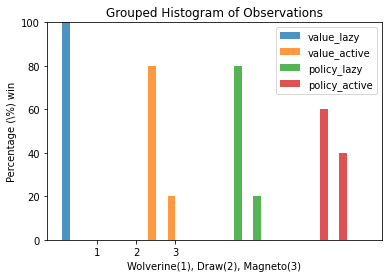

In [35]:
import matplotlib.pyplot as plt
import numpy as np

observations = [
    [value_lazy_wolverine, value_lazy_magneto, value_lazy_draw],
    [value_active_wolverine, value_active_magneto, value_active_draw],
    [policy_lazy_wolverine, policy_lazy_magneto, policy_lazy_draw],
    [policy_active_wolverine, policy_active_magneto, policy_active_draw],
]

observations_label = ["value_lazy", "value_active", "policy_lazy", "policy_active"]

# Create a list of observation numbers
observation_numbers = np.arange(1, len(observations))

bar_width = 0.2  # Adjust the width of the bars as needed
opacity = 0.8

fig, ax = plt.subplots()

for i, observation in enumerate(observations):
    # Calculate the positions for the bars
    positions = observation_numbers / 2 + i * (bar_width + 2)

    observation = [value * 10 for value in observation]

    # Plot the bars for each observation
    ax.bar(
        positions,
        observation,
        bar_width,
        alpha=opacity,
        label=f"{observations_label[i]}",
    )

ax.set_xlabel("Wolverine(1), Draw(2), Magneto(3)")
ax.set_ylabel("Percentage (\%) win")
ax.set_title("Grouped Histogram of Observations")
ax.set_xticks(observation_numbers + bar_width * 1.5)
ax.set_xticklabels(observation_numbers)
ax.legend()

plt.ylim(0, 100)
plt.show()

Time taken for each iteration in above methods were:

- Value Lazy: 0.9 sec
- Value Active: 25 sec
- Policy Lazy: 1.4 sec
- Policy Active: 49 sec

Results for lesser time and better winning chances:

- Magneto when in Active mode wins more number of times than in Lazy mode.
- Value Active is a good mode, with lesser time than Policy Active and better results than Value Lazy.